 ## Data Analysis Project 
<h3 style="color:#00FFFF; text-align:center;">Parsa Motamedi & Ramyar Keyghobadi</h3>

# Libararies

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as seb
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Patch
import matplotlib.colors as mcolors
import itertools
import matplotlib.dates as mdates


# Data Reading

In [11]:
Ds = pd.read_csv("open-meteo-35.68N51.43E1183m.csv")
Ds
# 0 = tehran
# 1 = Karaj
# 2 = Qom
# 3 = Semnan
# 4 = Saveh

location_id       time  weather_code (wmo code)  \
0                0  8/30/1995                        0   
1                0  8/31/1995                        1   
2                0   9/1/1995                       51   
3                0   9/2/1995                        1   
4                0   9/3/1995                        0   
...            ...        ...                      ...   
54860            4   9/9/2025                        0   
54861            4  9/10/2025                        3   
54862            4  9/11/2025                        2   
54863            4  9/12/2025                        0   
54864            4  9/13/2025                        0   

       temperature_2m_mean (°C)  temperature_2m_max (°C)  \
0                          30.0                     34.9   
1                          29.4                     35.4   
2                          27.3                     31.9   
3                          26.9                     30.5   
4                          26.3                     31.3   
...                         ...                      ...   
54860                      28.0                     34.5   
54861                      30.5                     35.4   
54862                      26.6                     33.0   
54863                      23.4                     29.6   
54864                      22.3                     28.9   

       temperature_2m_min (°C)  apparent_temperature_mean (°C)  \
0                         24.9                            28.0   
1                         21.2                            27.5   
2                         21.4                            27.3   
3                         23.9                            26.0   
4                         20.2                            24.6   
...                        ...                             ...   
54860                     21.2                            25.4   
54861                     24.4                            26.8   
54862                     19.5                            24.7   
54863                     17.1                            20.4   
54864                     15.1                            20.7   

       apparent_temperature_max (°C)  apparent_temperature_min (°C)  \
0                               33.5                           22.8   
1                               33.8                           19.6   
2                               32.6                           22.0   
3                               29.9                           22.5   
4                               29.9                           19.5   
...                              ...                            ...   
54860                           30.9                           18.9   
54861                           32.1                           21.4   
54862                           31.4                           18.4   
54863                           24.8                           15.6   
54864                           27.6                           13.5   

      sunrise (iso8601)  ... sunshine_duration (s)  precipitation_sum (mm)  \
0      1995-08-30T05:34  ...              43041.45                     0.0   
1      1995-08-31T05:35  ...              42907.79                     0.0   
2      1995-09-01T05:35  ...              41691.02                     0.2   
3      1995-09-02T05:36  ...              41215.29                     0.0   
4      1995-09-03T05:37  ...              41684.54                     0.0   
...                 ...  ...                   ...                     ...   
54860  2025-09-09T05:44  ...              40178.48                     0.0   
54861  2025-09-10T05:45  ...              40074.17                     0.0   
54862  2025-09-11T05:45  ...              39923.38                     0.0   
54863  2025-09-12T05:46  ...              39882.52                     0.0   
54864  2025-09-13T05:47  ...              39733.20                     0.0   

      

# DataCleaning

In [12]:
##Ds.rename(columns=lambda x: x.replace("Â", ""), inplace=True)
Ds["temperature_2m_mean (°C)"]=Ds["temperature_2m_mean (°C)"].ffill()

MinInMinTemp = Ds["temperature_2m_mean (°C)"].min()
print(MinInMinTemp)
MaxInMaxTemp = Ds["temperature_2m_mean (°C)"].max()
print(MaxInMaxTemp)

def ConverTempToHardCode(temp : float):
    if -18 < temp < -8 :
         return 0
    if -8 < temp < 0 :
        return 1
    if 0 < temp < 10 :
        return 2
    if 10 < temp < 20 :
        return 3 
    if 20 < temp < 30 :
        return 4
    if 30 < temp < 40 :
        return 5


Ds["mean_temp_Hardcode"] = Ds["temperature_2m_mean (°C)"].apply(ConverTempToHardCode)
print(Ds["temperature_2m_mean (°C)"].isnull().sum())


#Soton haii ke niaz be byte kamtari dashtan ro kamtar kardam
Ds["location_id"]=Ds["location_id"].astype(np.uint8)
Ds["weather_code (wmo code)"]=Ds["weather_code (wmo code)"].astype(np.uint16)
Ds["temperature_2m_mean (°C)"]=Ds["temperature_2m_mean (°C)"].astype(np.float16)
Ds["temperature_2m_max (°C)"]=Ds["temperature_2m_max (°C)"].astype(np.float16)
Ds["temperature_2m_min (°C)"]=Ds["temperature_2m_min (°C)"].astype(np.float16)
Ds["apparent_temperature_mean (°C)"]=Ds["apparent_temperature_mean (°C)"].astype(np.float16)
Ds["apparent_temperature_max (°C)"]=Ds["apparent_temperature_max (°C)"].astype(np.float16)
Ds["apparent_temperature_min (°C)"]=Ds["apparent_temperature_min (°C)"].astype(np.float16)
Ds["precipitation_sum (mm)"]=Ds["precipitation_sum (mm)"].astype(np.float16)
Ds["rain_sum (mm)"]=Ds["rain_sum (mm)"].astype(np.float16)
Ds["snowfall_sum (cm) "]=Ds["snowfall_sum (cm)"].astype(np.float16)
Ds["precipitation_hours (h)"]=Ds["precipitation_hours (h)"].astype(np.uint8)
Ds["wind_speed_10m_max (km/h)"]=Ds["wind_speed_10m_max (km/h)"].astype(np.float16)
Ds["wind_gusts_10m_max (km/h)"]=Ds["wind_gusts_10m_max (km/h)"].astype(np.float16)

Ds["wind_direction_10m_dominant (°))"]=Ds["wind_direction_10m_dominant (°)"].astype(np.uint16)

Ds["shortwave_radiation_sum (MJ/m²)"]=Ds["shortwave_radiation_sum (MJ/m²)"].astype(np.float16)
Ds["et0_fao_evapotranspiration (mm))"]=Ds["et0_fao_evapotranspiration (mm)"].astype(np.float16)
Ds.info()

-17.9
38.7
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54865 entries, 0 to 54864
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   location_id                       54865 non-null  uint8  
 1   time                              54865 non-null  object 
 2   weather_code (wmo code)           54865 non-null  uint16 
 3   temperature_2m_mean (°C)          54865 non-null  float16
 4   temperature_2m_max (°C)           54865 non-null  float16
 5   temperature_2m_min (°C)           54865 non-null  float16
 6   apparent_temperature_mean (°C)    54865 non-null  float16
 7   apparent_temperature_max (°C)     54865 non-null  float16
 8   apparent_temperature_min (°C)     54865 non-null  float16
 9   sunrise (iso8601)                 54865 non-null  object 
 10  sunset (iso8601)                  54865 non-null  object 
 11  daylight_duration (s)             54865 non-null  floa

# Comparative Urban Climate Map

Rain mean Tehran 0.663
Snow mean Tehran 0.044259546158753306
Rain mean Karaj 0.435
Snow mean Karaj 0.04067438257541237
Rain mean Qom 0.3467
Snow mean Qom 0.025619247243233393
Rain mean Semnan 0.2134
Snow mean Semnan 0.023622528023329994
Rain mean Saveh 0.6772
Snow mean Saveh 0.09390321698715029


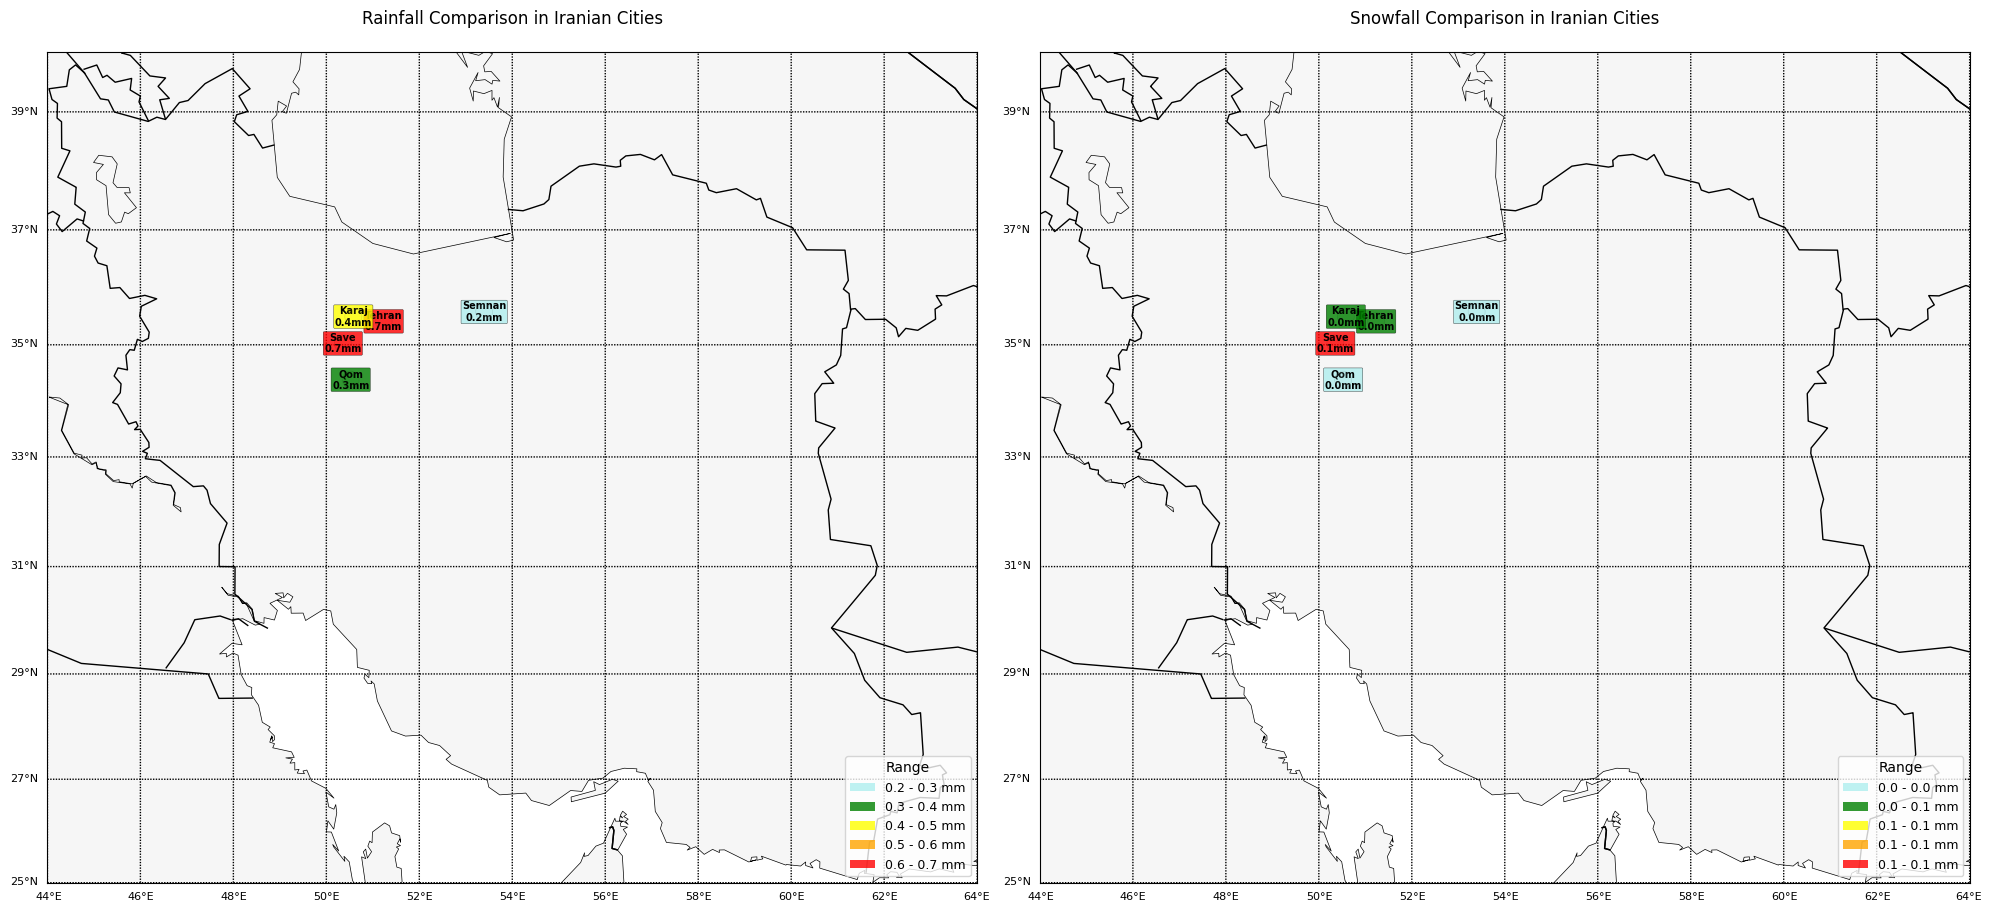

In [13]:
print("Rain mean Tehran",Ds["rain_sum (mm)"].where(Ds["location_id"] == 0).mean())
print("Snow mean Tehran",Ds["snowfall_sum (cm)"].where(Ds["location_id"] == 0).mean())

print("Rain mean Karaj",Ds["rain_sum (mm)"].where(Ds["location_id"] == 1).mean())
print("Snow mean Karaj",Ds["snowfall_sum (cm)"].where(Ds["location_id"] == 1).mean())

print("Rain mean Qom",Ds["rain_sum (mm)"].where(Ds["location_id"] == 2).mean())
print("Snow mean Qom",Ds["snowfall_sum (cm)"].where(Ds["location_id"] == 2).mean())

print("Rain mean Semnan",Ds["rain_sum (mm)"].where(Ds["location_id"] == 3).mean())
print("Snow mean Semnan",Ds["snowfall_sum (cm)"].where(Ds["location_id"] == 3).mean())

print("Rain mean Saveh",Ds["rain_sum (mm)"].where(Ds["location_id"] == 4).mean())
print("Snow mean Saveh",Ds["snowfall_sum (cm)"].where(Ds["location_id"] == 4).mean())



dataset = pd.read_excel("C:\\Users\\admin\\Desktop\\raamrrfaepkmicadlkvnadf\\cities_coordinate.xlsx")
dataset.to_csv("C:\\Users\\admin\\Desktop\\raamrrfaepkmicadlkvnadf\\cities_coordinate.csv")

latt = dataset["lat"]
lonn = dataset["lon"]
rain_size = dataset["Rain mean "]
snow_size = dataset["Snow mean"]
cities = dataset["City"]

colors = ['paleturquoise', 'green', 'yellow', 'orange', 'red']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

axes = [ax1, ax2]
datasets = [rain_size, snow_size]
titles = ['Rainfall Comparison in Iranian Cities', 'Snowfall Comparison in Iranian Cities']

offsets = {
    'Tehran': (0.3, 0.3),
    'Karaj': (-0.3, -0.3),
    'Semnan': (0.3, 0),
    'Qom': (-0.3, 0),
    'Saveh': (0, 0.3)
}

for i2, (ax, data, title) in enumerate(zip(axes, datasets, titles)):
    values = sorted(data.values)  
    ks = np.linspace(min(values), max(values), 6)
    city_colors = []
    for value in data.values:
        for i in range(5):
            if ks[i] <= value <= ks[i+1]:
                city_colors.append(colors[i])
                break

    m = Basemap(llcrnrlon=44, llcrnrlat=25., urcrnrlon=64, urcrnrlat=40, 
                resolution='l', projection='merc',
                lat_0=32.5, lon_0=53.5, lat_ts=20., ax=ax)

    m.drawcoastlines(linewidth=0.5)
    m.drawcountries(linewidth=1)
    m.fillcontinents(color='lightgray', alpha=0.2)

    m.drawparallels(np.arange(25, 41, 2), labels=[1, 0, 0, 0], fontsize=8)
    m.drawmeridians(np.arange(44, 65, 2), labels=[0, 0, 0, 1], fontsize=8)

    x, y = m(lonn.values, latt.values)

    noghteyabi = m.scatter(x, y, s=150, marker='o', alpha=0.1, c=city_colors, 
                       edgecolors='black', linewidth=0.5, zorder=5)

    for i, (city, x_pos, y_pos, value, color) in enumerate(zip(cities, x, y, data.values, city_colors)):
        
        if city in offsets:
            offset_x, offset_y = offsets[city]
        else:
            offset_x, offset_y = (0, 0)
        
        unit = 'mm'
        ax.text(x_pos + offset_x, y_pos + offset_y, f'{city}\n{value:.1f}{unit}', 
                 fontsize=7, ha='center', va='center', 
                 fontweight='bold', color='black',
                 bbox=dict(boxstyle="round,pad=0.1", facecolor=color, alpha=0.8,
                          edgecolor='black', linewidth=0.3))

    eleman = []
    for i in range(5):
        text = f'{ks[i]:.1f} - {ks[i+1]:.1f} mm'
        eleman.append(Patch(facecolor=colors[i], label=text, alpha=0.8))
    
    ax.legend(handles=eleman, loc='lower right', title='Range', fontsize=9)
    ax.set_title(title, fontsize=12, pad=20)

plt.tight_layout()
plt.show()

# Analysis individual

## Tehran

### Temperature Changes During Years

C:\Users\admin\AppData\Local\Temp\ipykernel_11720\4078956062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tehran["time"] = pd.to_datetime(tehran["time"])


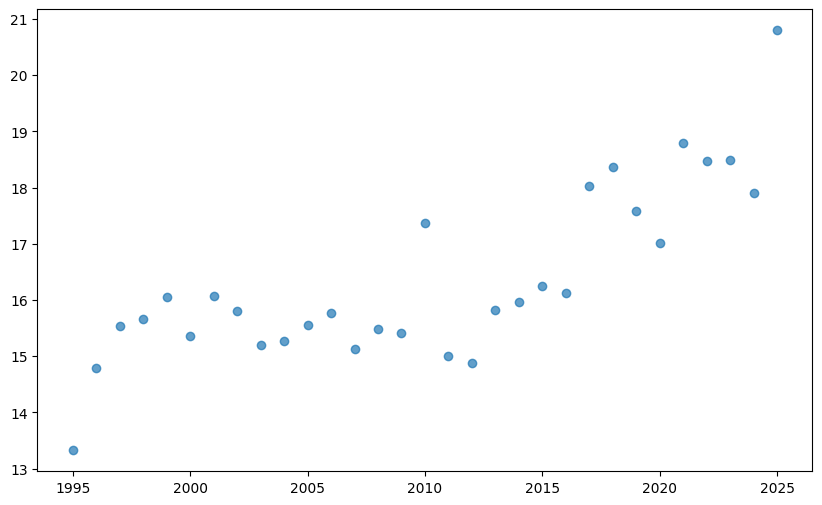

In [14]:
tehran = Ds[Ds["location_id"] == 0]
tehran["time"] = pd.to_datetime(tehran["time"])
yearly_mean_temp = tehran.groupby(tehran["time"].dt.year)["temperature_2m_mean (°C)"].mean().reset_index()

plt.figure(figsize=(10,6))
plt.scatter(yearly_mean_temp["time"], yearly_mean_temp["temperature_2m_mean (°C)"], alpha=0.7, label="Mean Temp per Year")

### Raining Avg During Years

C:\Users\admin\AppData\Local\Temp\ipykernel_11720\4108533472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tehran["time"] = pd.to_datetime(tehran["time"])
C:\Users\admin\AppData\Local\Temp\ipykernel_11720\4108533472.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tehran["year"] = tehran["time"].dt.year


<BarContainer object of 31 artists>

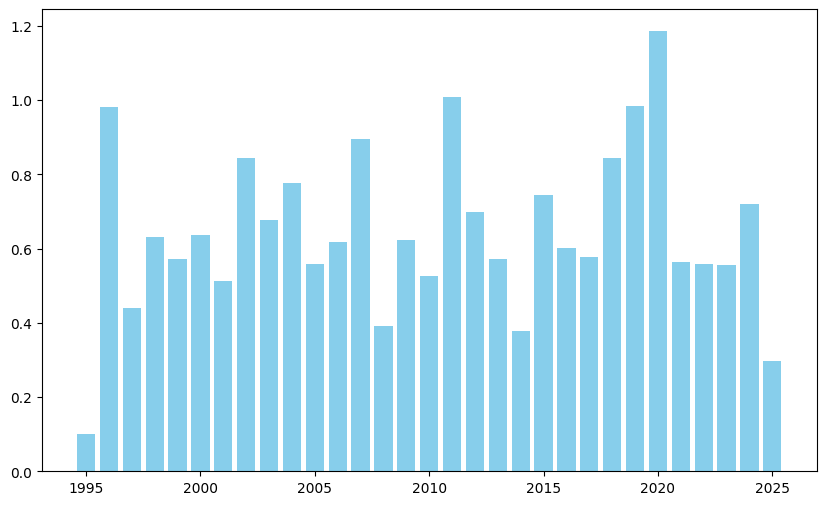

In [15]:
tehran = Ds[Ds["location_id"] == 0]
tehran["time"] = pd.to_datetime(tehran["time"])
tehran_groupby_year = tehran.groupby(tehran["time"])
tehran["year"] = tehran["time"].dt.year
tehran
tehran_avg_raining = rain_avg_by_year = tehran.groupby("year")["rain_sum (mm)"].mean().reset_index()

tehran_avg_raining

plt.figure(figsize=(10,6))
plt.bar(tehran_avg_raining["year"], tehran_avg_raining["rain_sum (mm)"], color='skyblue')


### Raining Avg Compare with DayLight Duration

C:\Users\admin\AppData\Local\Temp\ipykernel_11720\2935816531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tehran["time"] = pd.to_datetime(tehran["time"])
C:\Users\admin\AppData\Local\Temp\ipykernel_11720\2935816531.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tehran["year"] = tehran["time"].dt.year


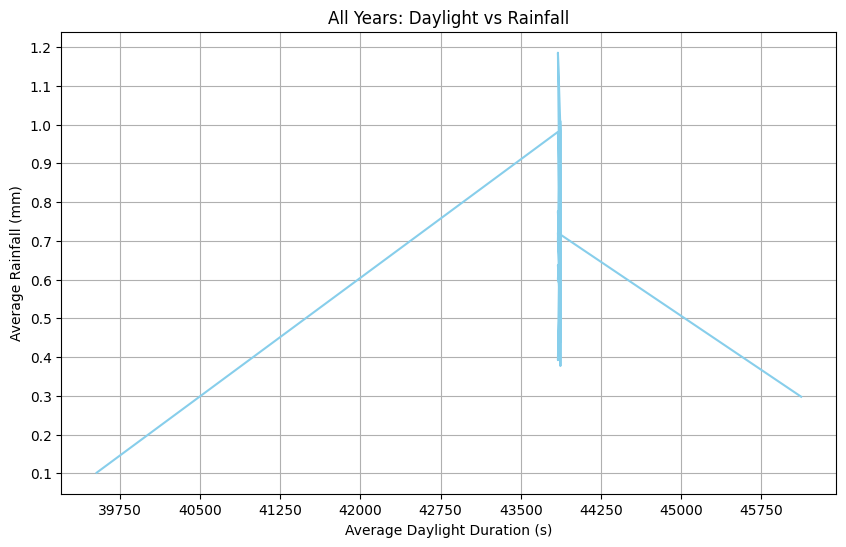

In [16]:
tehran = Ds[Ds["location_id"] == 0]
tehran["time"] = pd.to_datetime(tehran["time"])
tehran_groupby_year = tehran.groupby(tehran["time"])
tehran["year"] = tehran["time"].dt.year
tehran
tehran_avg_Daylight = tehran.groupby("year")["daylight_duration (s)"].mean().reset_index()

tehran_avg_rain = tehran.groupby("year")["rain_sum (mm)"].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(tehran_avg_Daylight["daylight_duration (s)"], 
         tehran_avg_rain["rain_sum (mm)"], 
         color='skyblue')
plt.gca().yaxis.set_major_locator(MultipleLocator(0.1))
plt.gca().xaxis.set_major_locator(MultipleLocator(750))
plt.title("All Years: Daylight vs Rainfall")
plt.xlabel("Average Daylight Duration (s)")
plt.ylabel("Average Rainfall (mm)")
plt.grid(True)
plt.show()


### Compare the raining avg with The Temperture Range

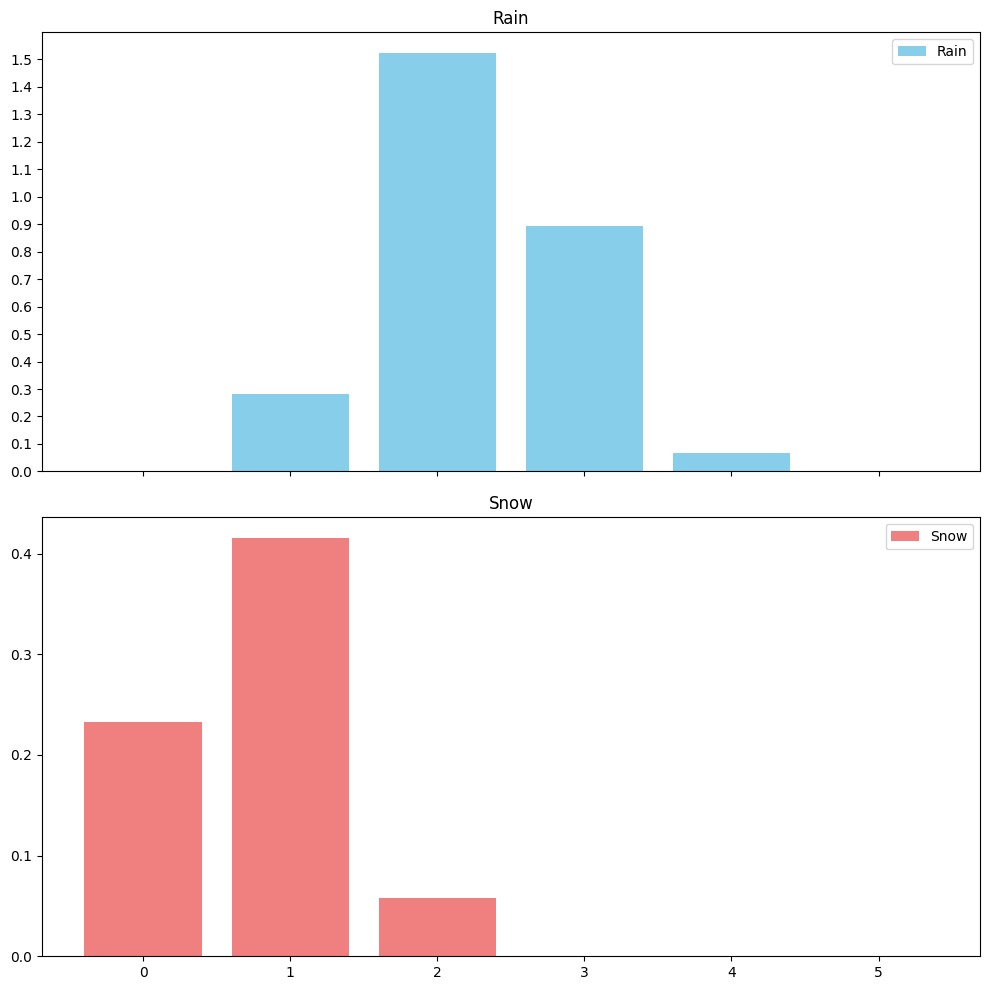

In [17]:

tehran = Ds[Ds["location_id"] == 0]

tehran_avg_rain = tehran.groupby("mean_temp_Hardcode")["rain_sum (mm)"].mean().reset_index()
tehran_avg_snow = tehran.groupby("mean_temp_Hardcode")["snowfall_sum (cm)"].mean().reset_index()

fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

axes[0].bar(tehran_avg_rain["mean_temp_Hardcode"], tehran_avg_rain["rain_sum (mm)"], color='skyblue')
axes[0].set_title("Rain")
axes[0].yaxis.set_major_locator(MultipleLocator(0.1))
axes[0].legend(["Rain"])

axes[1].bar(tehran_avg_snow["mean_temp_Hardcode"], tehran_avg_snow["snowfall_sum (cm)"], color='lightcoral')
axes[1].set_title("Snow")
axes[1].yaxis.set_major_locator(MultipleLocator(0.1))
axes[1].legend(["Snow"])


plt.tight_layout()
plt.show()



### Compare With Wind Speed

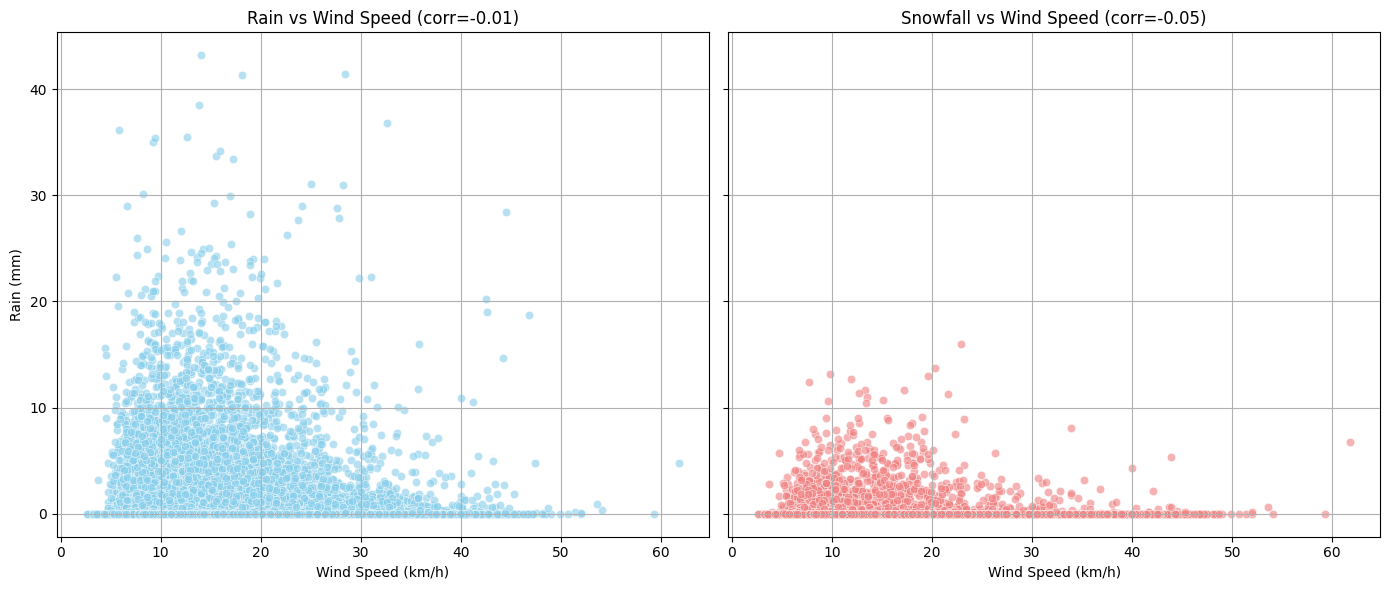

In [18]:


df = Ds[["rain_sum (mm)", "snowfall_sum (cm)", "wind_speed_10m_max (km/h)"]].dropna()

corr_rain = df["rain_sum (mm)"].corr(df["wind_speed_10m_max (km/h)"].where(Ds["location_id"] == 0))
corr_snow = df["snowfall_sum (cm)"].corr(df["wind_speed_10m_max (km/h)"].where(Ds["location_id"] == 0))


fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)


seb.scatterplot(
    x="wind_speed_10m_max (km/h)", y="rain_sum (mm)", data=df,
    alpha=0.6, ax=axes[0], color="skyblue"
)
axes[0].set_title(f"Rain vs Wind Speed (corr={corr_rain:.2f})")
axes[0].set_xlabel("Wind Speed (km/h)")
axes[0].set_ylabel("Rain (mm)")
axes[0].grid(True)


seb.scatterplot(
    x="wind_speed_10m_max (km/h)", y="snowfall_sum (cm)", data=df,
    alpha=0.6, ax=axes[1], color="lightcoral"
)
axes[1].set_title(f"Snowfall vs Wind Speed (corr={corr_snow:.2f})")
axes[1].set_xlabel("Wind Speed (km/h)")
axes[1].set_ylabel("Snowfall (cm)")
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Show The Tempurture Changes During The Year And How Effect the Raining Or Snowing

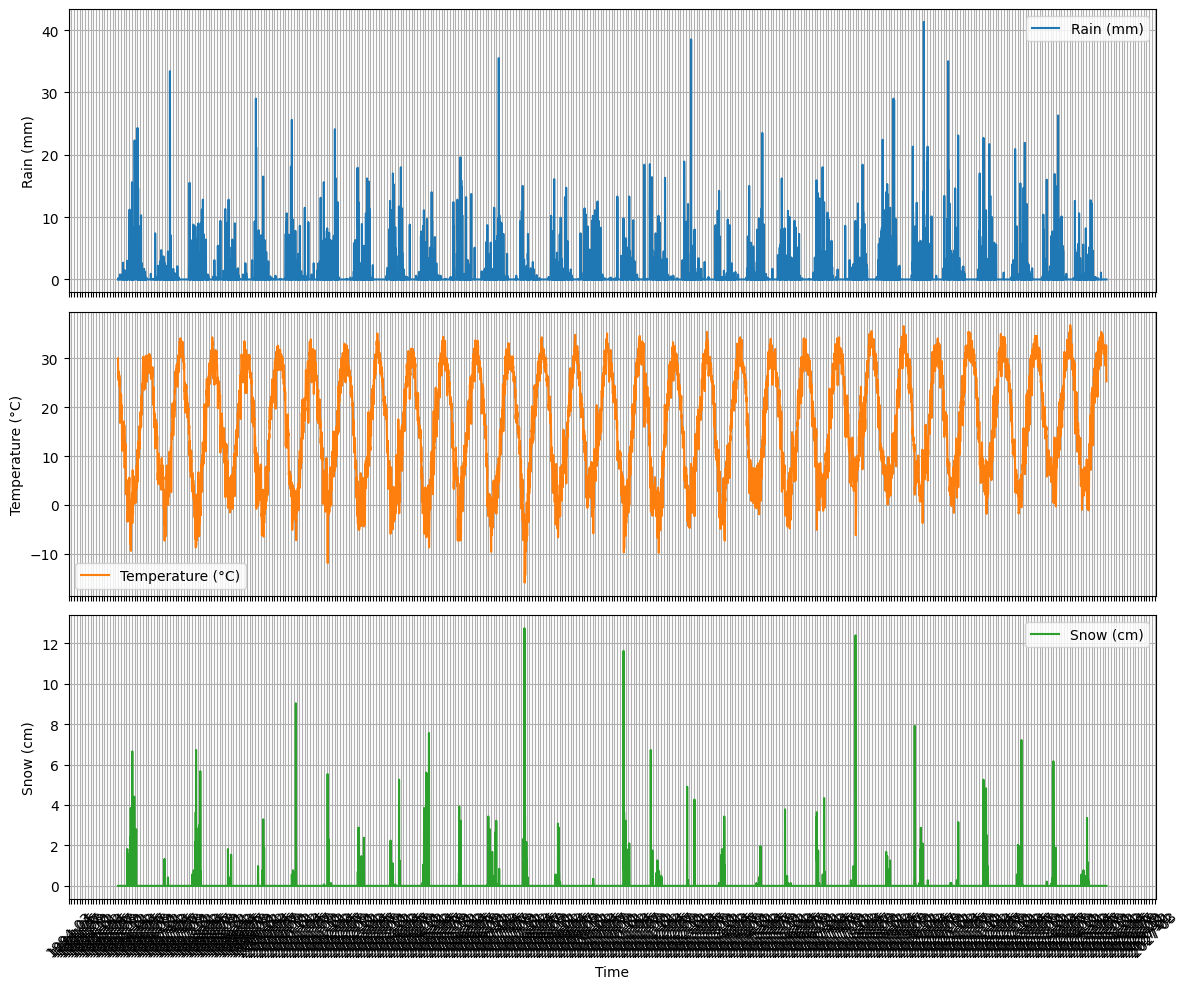

In [19]:


Temperature = Ds["temperature_2m_mean (°C)"].where(Ds["location_id"] == 0)
time = pd.to_datetime(Ds["time"], errors="coerce")
Snow = Ds["snowfall_sum (cm)"].where(Ds["location_id"] == 0)
Rain = Ds["rain_sum (mm)"].where(Ds["location_id"] == 0)


fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)


axs[0].plot(time, Rain, "C0", label="Rain (mm)")
axs[0].set_ylabel("Rain (mm)")
axs[0].legend()
axs[0].grid(True)


axs[1].plot(time, Temperature, "C1", label="Temperature (°C)")
axs[1].set_ylabel("Temperature (°C)")
axs[1].legend()
axs[1].grid(True)


axs[2].plot(time, Snow, "C2", label="Snow (cm)")
axs[2].set_ylabel("Snow (cm)")
axs[2].set_xlabel("Time")
axs[2].legend()
axs[2].grid(True)


axs[2].xaxis.set_major_locator(mdates.MonthLocator())  
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout()  
plt.show()

## Karaj

### Temperature Changes During Years

C:\Users\admin\AppData\Local\Temp\ipykernel_11720\3159651752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  karaj["time"] = pd.to_datetime(karaj["time"])


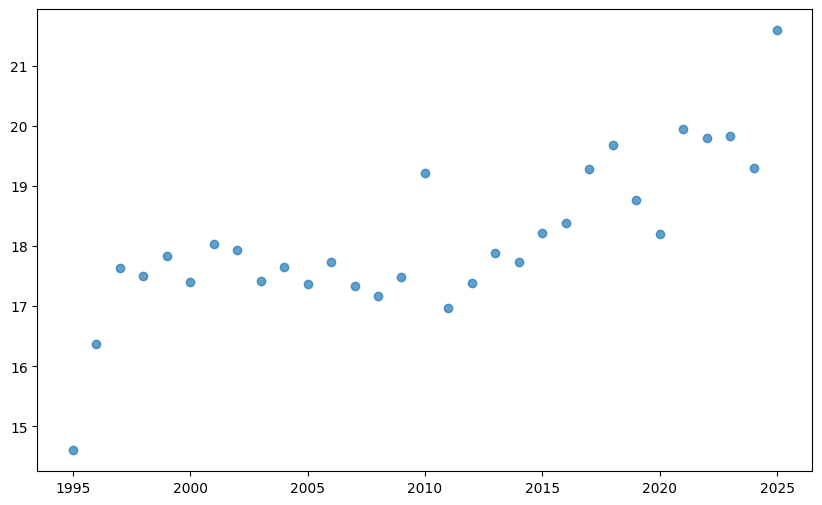

In [20]:
karaj = Ds[Ds["location_id"] == 1]
karaj["time"] = pd.to_datetime(karaj["time"])
yearly_mean_temp = karaj.groupby(karaj["time"].dt.year)["temperature_2m_mean (°C)"].mean().reset_index()

plt.figure(figsize=(10,6))
plt.scatter(yearly_mean_temp["time"], yearly_mean_temp["temperature_2m_mean (°C)"], alpha=0.7, label="Mean Temp per Year")

### Raining Avg During Years

C:\Users\admin\AppData\Local\Temp\ipykernel_11720\262195053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  karaj["time"] = pd.to_datetime(karaj["time"])
C:\Users\admin\AppData\Local\Temp\ipykernel_11720\262195053.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  karaj["year"] = karaj["time"].dt.year


<BarContainer object of 31 artists>

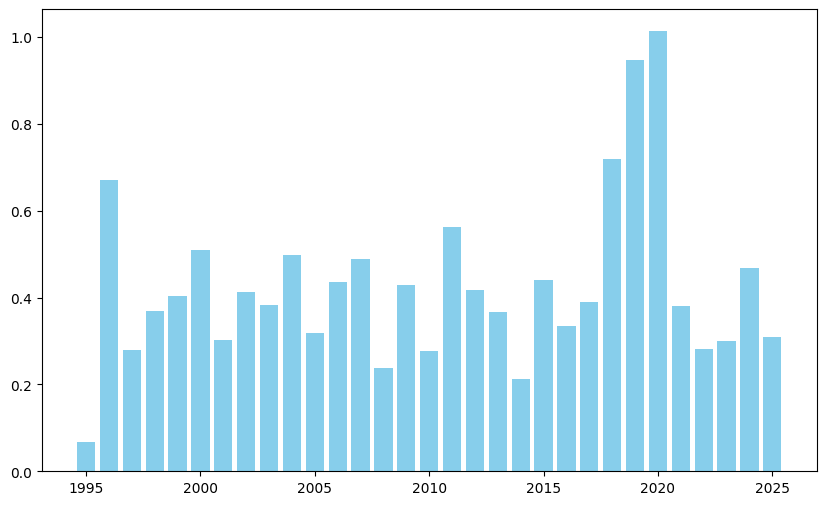

In [21]:
karaj = Ds[Ds["location_id"] == 1]
karaj["time"] = pd.to_datetime(karaj["time"])
tehran_groupby_year = karaj.groupby(karaj["time"])
karaj["year"] = karaj["time"].dt.year
karaj
karaj_avg_raining = rain_avg_by_year = karaj.groupby("year")["rain_sum (mm)"].mean().reset_index()

karaj_avg_raining

plt.figure(figsize=(10,6))
plt.bar(karaj_avg_raining["year"], karaj_avg_raining["rain_sum (mm)"], color='skyblue')


### Raining Avg Compare with DayLight Duration

C:\Users\admin\AppData\Local\Temp\ipykernel_11720\3022548580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Karaj["time"] = pd.to_datetime(Karaj["time"])
C:\Users\admin\AppData\Local\Temp\ipykernel_11720\3022548580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Karaj["year"] = Karaj["time"].dt.year


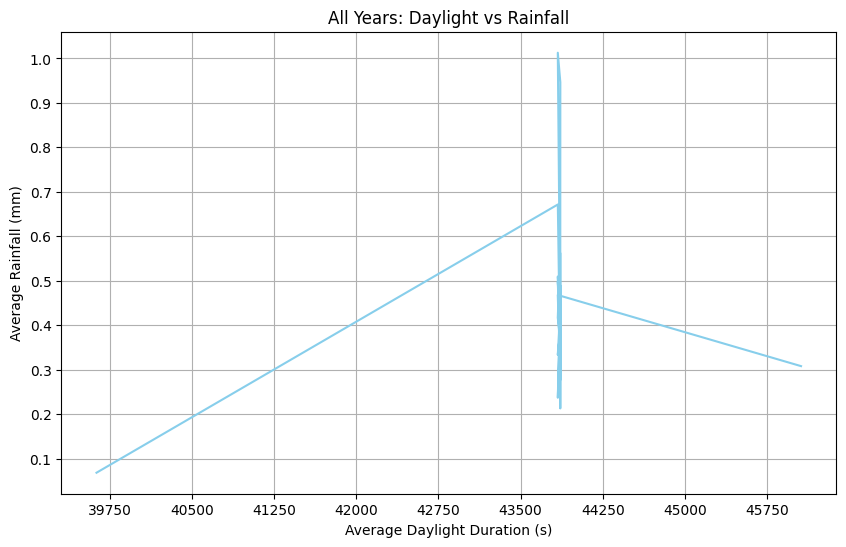

In [22]:
Karaj = Ds[Ds["location_id"] == 1]
Karaj["time"] = pd.to_datetime(Karaj["time"])
Karaj_groupby_year = Karaj.groupby(Karaj["time"])
Karaj["year"] = Karaj["time"].dt.year
Karaj
Karaj_avg_Daylight = Karaj.groupby("year")["daylight_duration (s)"].mean().reset_index()

Karaj_avg_rain = Karaj.groupby("year")["rain_sum (mm)"].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(Karaj_avg_Daylight["daylight_duration (s)"], 
         Karaj_avg_rain["rain_sum (mm)"], 
         color='skyblue')
plt.gca().yaxis.set_major_locator(MultipleLocator(0.1))
plt.gca().xaxis.set_major_locator(MultipleLocator(750))
plt.title("All Years: Daylight vs Rainfall")
plt.xlabel("Average Daylight Duration (s)")
plt.ylabel("Average Rainfall (mm)")
plt.grid(True)
plt.show()


### Compare the raining avg with The Temperture Range

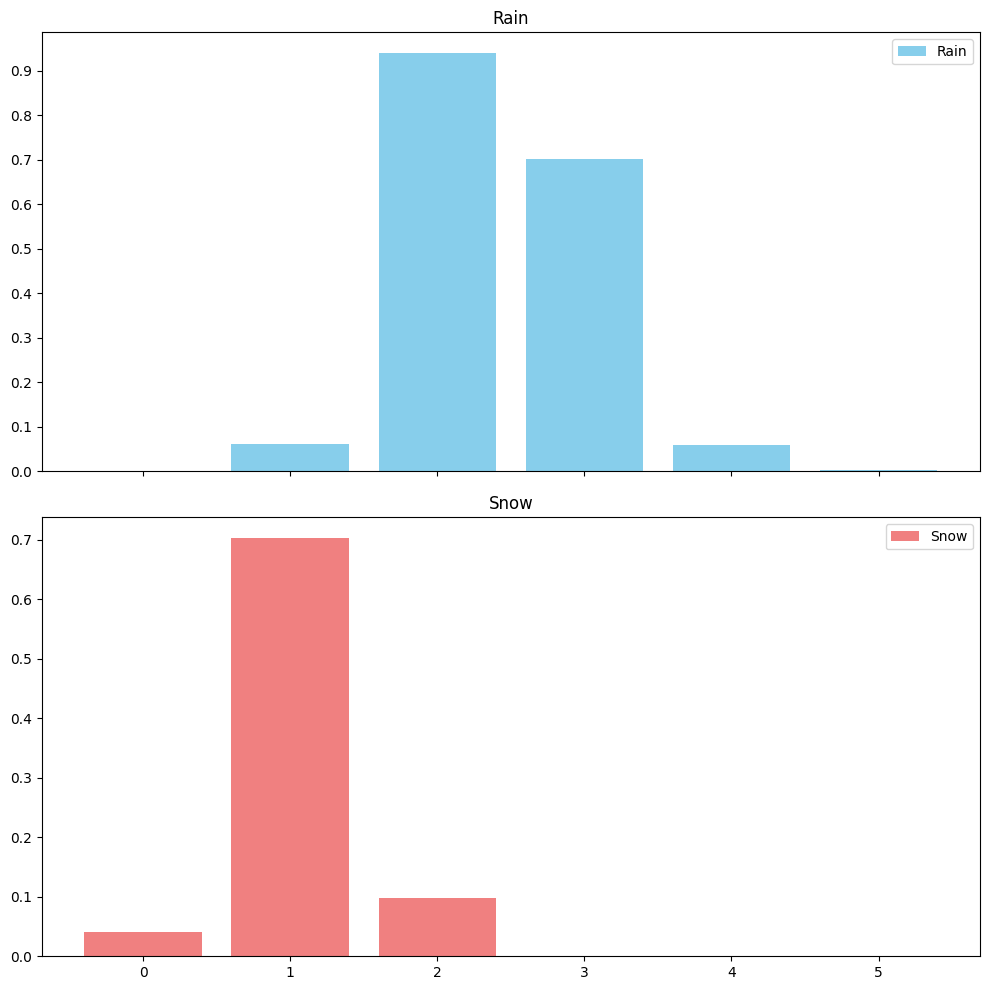

In [23]:

karaj = Ds[Ds["location_id"] == 1]

karaj_avg_rain = karaj.groupby("mean_temp_Hardcode")["rain_sum (mm)"].mean().reset_index()
karaj_avg_snow = karaj.groupby("mean_temp_Hardcode")["snowfall_sum (cm)"].mean().reset_index()

fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

axes[0].bar(karaj_avg_rain["mean_temp_Hardcode"], karaj_avg_rain["rain_sum (mm)"], color='skyblue')
axes[0].set_title("Rain")
axes[0].yaxis.set_major_locator(MultipleLocator(0.1))
axes[0].legend(["Rain"])

axes[1].bar(karaj_avg_snow["mean_temp_Hardcode"], karaj_avg_snow["snowfall_sum (cm)"], color='lightcoral')
axes[1].set_title("Snow")
axes[1].yaxis.set_major_locator(MultipleLocator(0.1))
axes[1].legend(["Snow"])


plt.tight_layout()
plt.show()



### Compare With Wind Speed

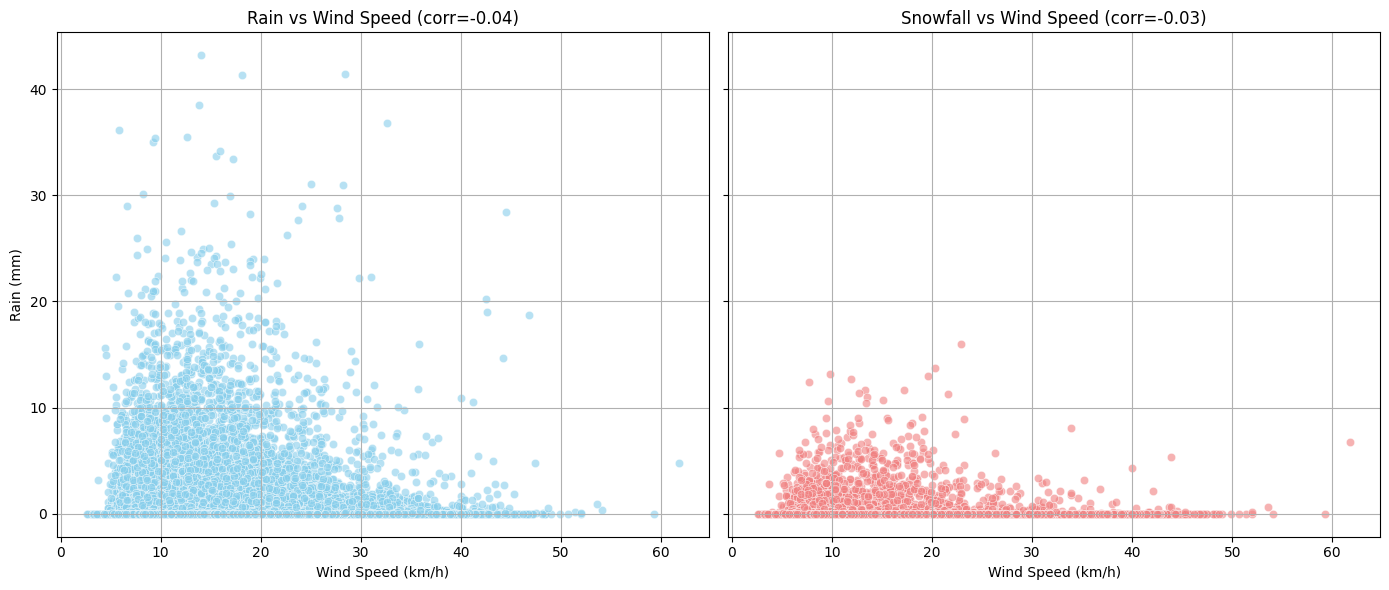

In [24]:


df = Ds[["rain_sum (mm)", "snowfall_sum (cm)", "wind_speed_10m_max (km/h)"]].dropna()

corr_rain = df["rain_sum (mm)"].corr(df["wind_speed_10m_max (km/h)"].where(Ds["location_id"] == 1))
corr_snow = df["snowfall_sum (cm)"].corr(df["wind_speed_10m_max (km/h)"].where(Ds["location_id"] == 1))


fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)


seb.scatterplot(
    x="wind_speed_10m_max (km/h)", y="rain_sum (mm)", data=df,
    alpha=0.6, ax=axes[0], color="skyblue"
)
axes[0].set_title(f"Rain vs Wind Speed (corr={corr_rain:.2f})")
axes[0].set_xlabel("Wind Speed (km/h)")
axes[0].set_ylabel("Rain (mm)")
axes[0].grid(True)


seb.scatterplot(
    x="wind_speed_10m_max (km/h)", y="snowfall_sum (cm)", data=df,
    alpha=0.6, ax=axes[1], color="lightcoral"
)
axes[1].set_title(f"Snowfall vs Wind Speed (corr={corr_snow:.2f})")
axes[1].set_xlabel("Wind Speed (km/h)")
axes[1].set_ylabel("Snowfall (cm)")
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Show The Tempurture Changes During The Year And How Effect the Raining Or Snowing

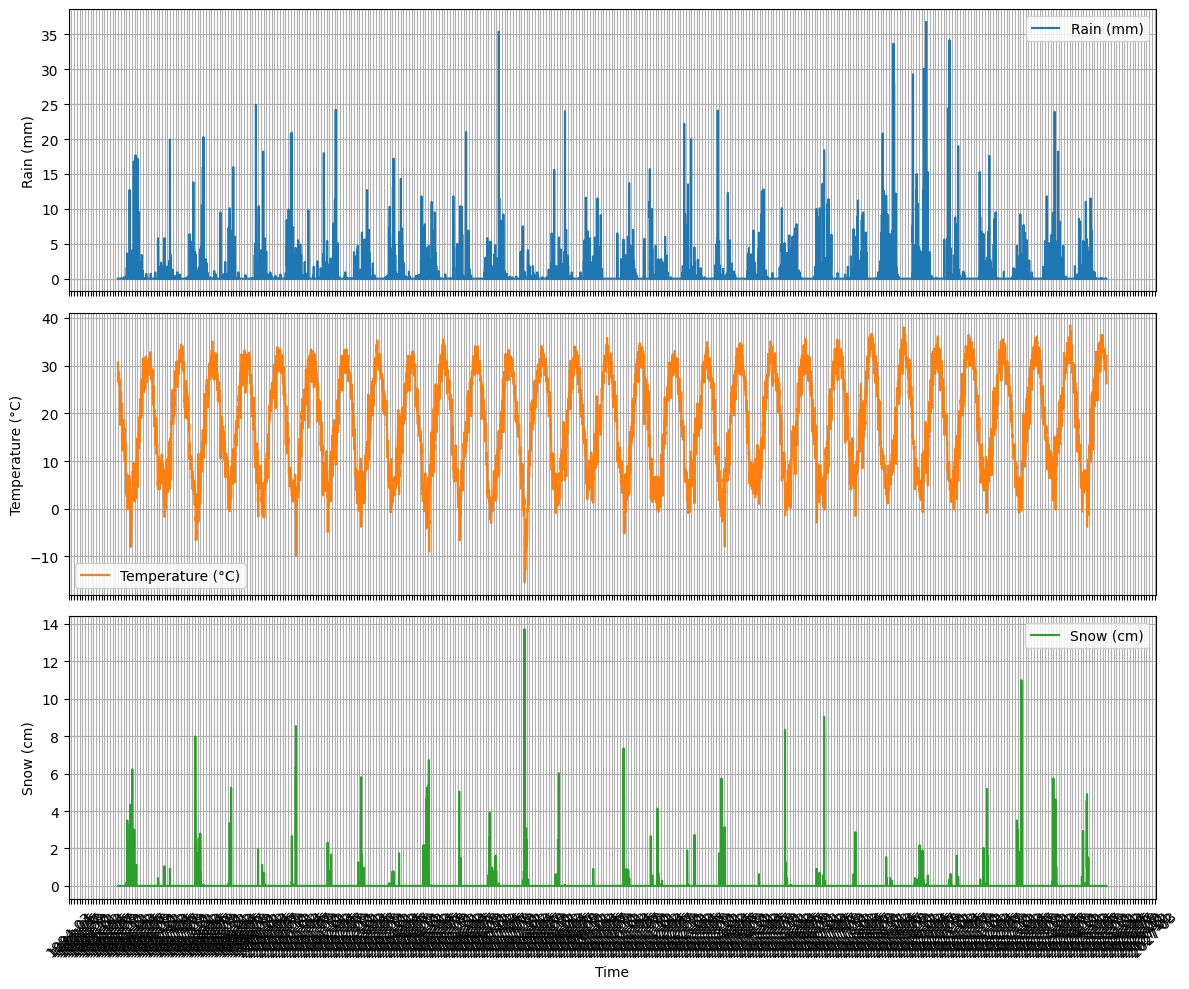

In [25]:


Temperature = Ds["temperature_2m_mean (°C)"].where(Ds["location_id"] == 1)
time = pd.to_datetime(Ds["time"], errors="coerce")
Snow = Ds["snowfall_sum (cm)"].where(Ds["location_id"] == 1)
Rain = Ds["rain_sum (mm)"].where(Ds["location_id"] == 1)


fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)


axs[0].plot(time, Rain, "C0", label="Rain (mm)")
axs[0].set_ylabel("Rain (mm)")
axs[0].legend()
axs[0].grid(True)


axs[1].plot(time, Temperature, "C1", label="Temperature (°C)")
axs[1].set_ylabel("Temperature (°C)")
axs[1].legend()
axs[1].grid(True)


axs[2].plot(time, Snow, "C2", label="Snow (cm)")
axs[2].set_ylabel("Snow (cm)")
axs[2].set_xlabel("Time")
axs[2].legend()
axs[2].grid(True)


axs[2].xaxis.set_major_locator(mdates.MonthLocator())  
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout()  
plt.show()

## Qom

### Temperature Changes During Years

C:\Users\admin\AppData\Local\Temp\ipykernel_11720\1680375116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Qom["time"] = pd.to_datetime(Qom["time"])


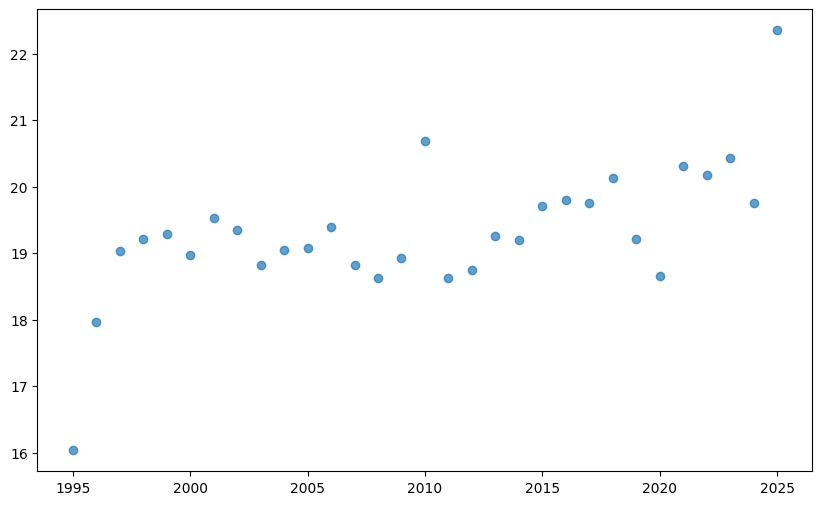

In [26]:
Qom = Ds[Ds["location_id"] == 2]
Qom["time"] = pd.to_datetime(Qom["time"])
yearly_mean_temp = Qom.groupby(Qom["time"].dt.year)["temperature_2m_mean (°C)"].mean().reset_index()

plt.figure(figsize=(10,6))
plt.scatter(yearly_mean_temp["time"], yearly_mean_temp["temperature_2m_mean (°C)"], alpha=0.7, label="Mean Temp per Year")

### Raining Avg During Years

C:\Users\admin\AppData\Local\Temp\ipykernel_11720\2666086104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Qom["time"] = pd.to_datetime(Qom["time"])
C:\Users\admin\AppData\Local\Temp\ipykernel_11720\2666086104.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Qom["year"] = Qom["time"].dt.year


<BarContainer object of 31 artists>

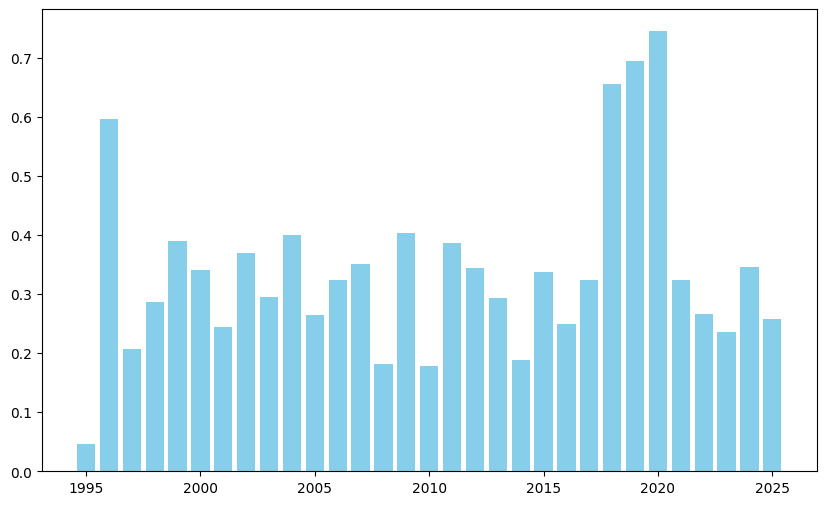

In [27]:
Qom = Ds[Ds["location_id"] == 2]
Qom["time"] = pd.to_datetime(Qom["time"])
Qom_groupby_year = Qom.groupby(Qom["time"])
Qom["year"] = Qom["time"].dt.year
Qom
Qom_avg_raining = Qom_avg_by_year = Qom.groupby("year")["rain_sum (mm)"].mean().reset_index()

Qom_avg_raining

plt.figure(figsize=(10,6))
plt.bar(Qom_avg_raining["year"], Qom_avg_raining["rain_sum (mm)"], color='skyblue')


### Raining Avg Compare with DayLight Duration

C:\Users\admin\AppData\Local\Temp\ipykernel_11720\4139527837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Qom["time"] = pd.to_datetime(Qom["time"])
C:\Users\admin\AppData\Local\Temp\ipykernel_11720\4139527837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Qom["year"] = Qom["time"].dt.year


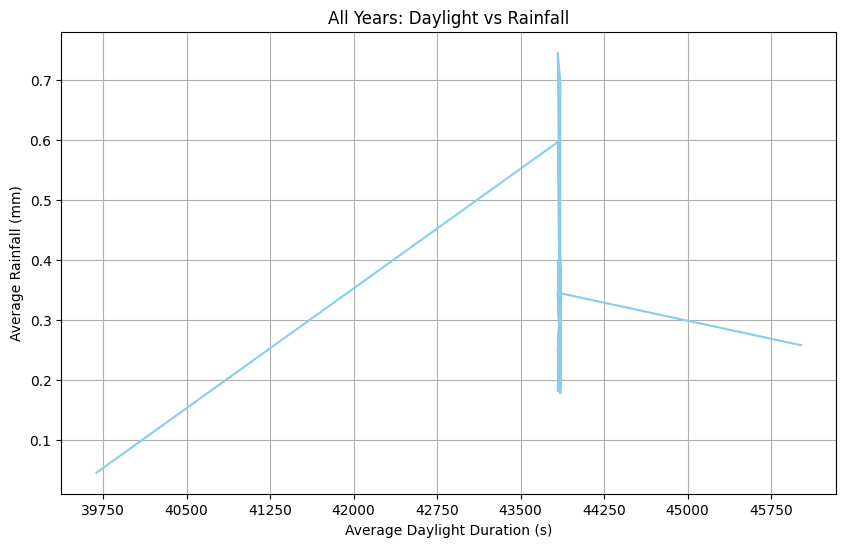

In [28]:
Qom = Ds[Ds["location_id"] == 2]
Qom["time"] = pd.to_datetime(Qom["time"])
Qom_groupby_year = Qom.groupby(Qom["time"])
Qom["year"] = Qom["time"].dt.year
Qom
Qom_avg_Daylight = Qom.groupby("year")["daylight_duration (s)"].mean().reset_index()

Qom_avg_rain = Qom.groupby("year")["rain_sum (mm)"].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(Qom_avg_Daylight["daylight_duration (s)"], 
         Qom_avg_rain["rain_sum (mm)"], 
         color='skyblue')
plt.gca().yaxis.set_major_locator(MultipleLocator(0.1))
plt.gca().xaxis.set_major_locator(MultipleLocator(750))
plt.title("All Years: Daylight vs Rainfall")
plt.xlabel("Average Daylight Duration (s)")
plt.ylabel("Average Rainfall (mm)")
plt.grid(True)
plt.show()


### Compare the raining avg with The Temperture Range

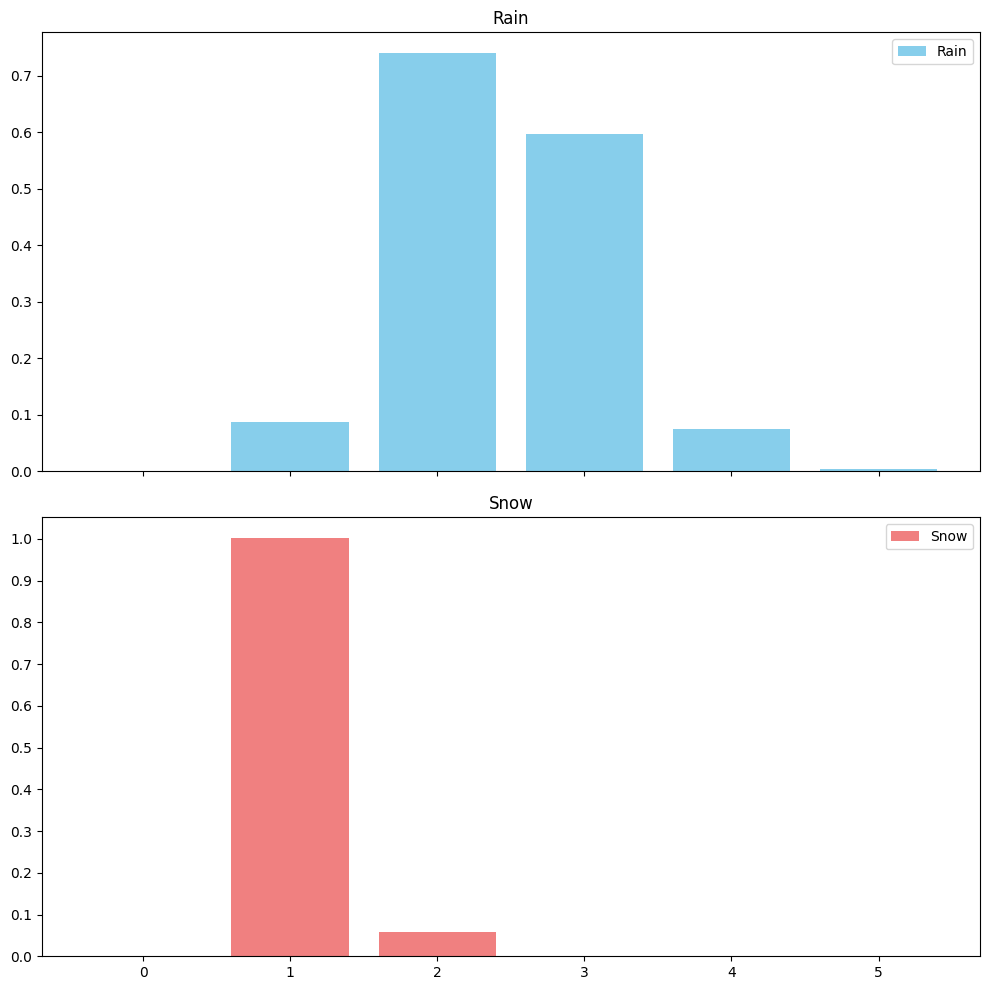

In [29]:

Qom = Ds[Ds["location_id"] == 2]

Qom_avg_rain = Qom.groupby("mean_temp_Hardcode")["rain_sum (mm)"].mean().reset_index()
Qom_avg_snow = Qom.groupby("mean_temp_Hardcode")["snowfall_sum (cm)"].mean().reset_index()

fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

axes[0].bar(Qom_avg_rain["mean_temp_Hardcode"], Qom_avg_rain["rain_sum (mm)"], color='skyblue')
axes[0].set_title("Rain")
axes[0].yaxis.set_major_locator(MultipleLocator(0.1))
axes[0].legend(["Rain"])

axes[1].bar(Qom_avg_snow["mean_temp_Hardcode"], Qom_avg_snow["snowfall_sum (cm)"], color='lightcoral')
axes[1].set_title("Snow")
axes[1].yaxis.set_major_locator(MultipleLocator(0.1))
axes[1].legend(["Snow"])


plt.tight_layout()
plt.show()



### Compare With Wind Speed

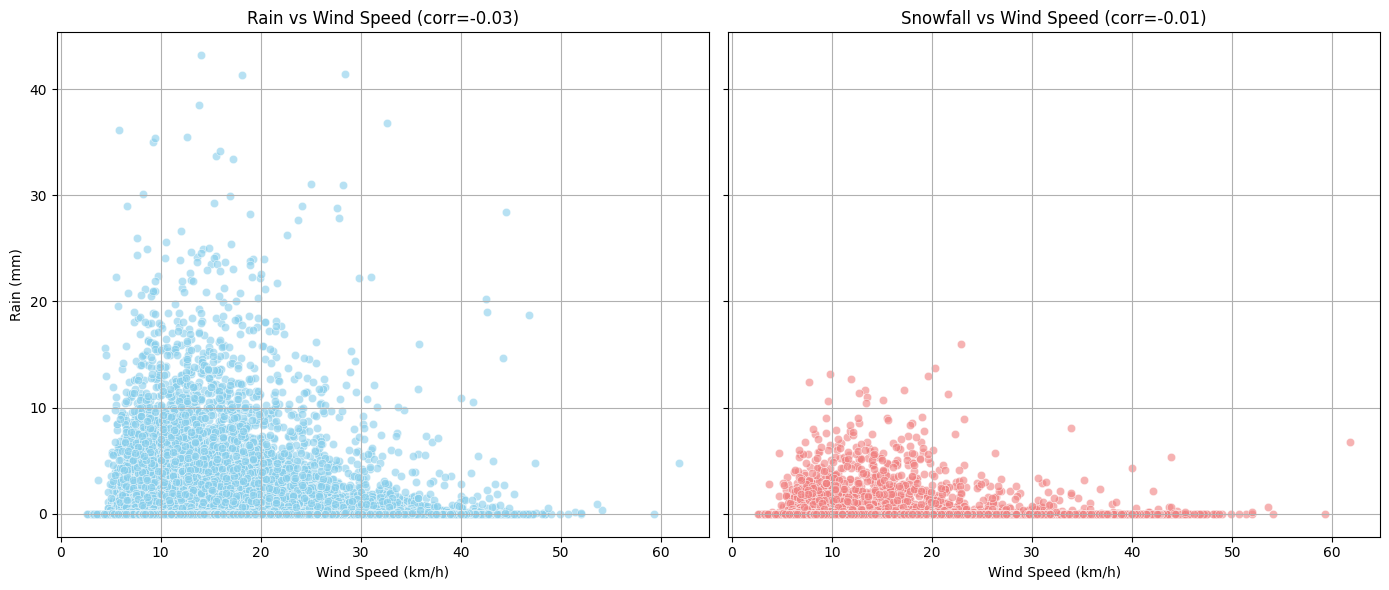

In [30]:


df = Ds[["rain_sum (mm)", "snowfall_sum (cm)", "wind_speed_10m_max (km/h)"]].dropna()

corr_rain = df["rain_sum (mm)"].corr(df["wind_speed_10m_max (km/h)"].where(Ds["location_id"] == 2))
corr_snow = df["snowfall_sum (cm)"].corr(df["wind_speed_10m_max (km/h)"].where(Ds["location_id"] == 2))


fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)


seb.scatterplot(
    x="wind_speed_10m_max (km/h)", y="rain_sum (mm)", data=df,
    alpha=0.6, ax=axes[0], color="skyblue"
)
axes[0].set_title(f"Rain vs Wind Speed (corr={corr_rain:.2f})")
axes[0].set_xlabel("Wind Speed (km/h)")
axes[0].set_ylabel("Rain (mm)")
axes[0].grid(True)


seb.scatterplot(
    x="wind_speed_10m_max (km/h)", y="snowfall_sum (cm)", data=df,
    alpha=0.6, ax=axes[1], color="lightcoral"
)
axes[1].set_title(f"Snowfall vs Wind Speed (corr={corr_snow:.2f})")
axes[1].set_xlabel("Wind Speed (km/h)")
axes[1].set_ylabel("Snowfall (cm)")
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Show The Tempurture Changes During The Year And How Effect the Raining Or Snowing

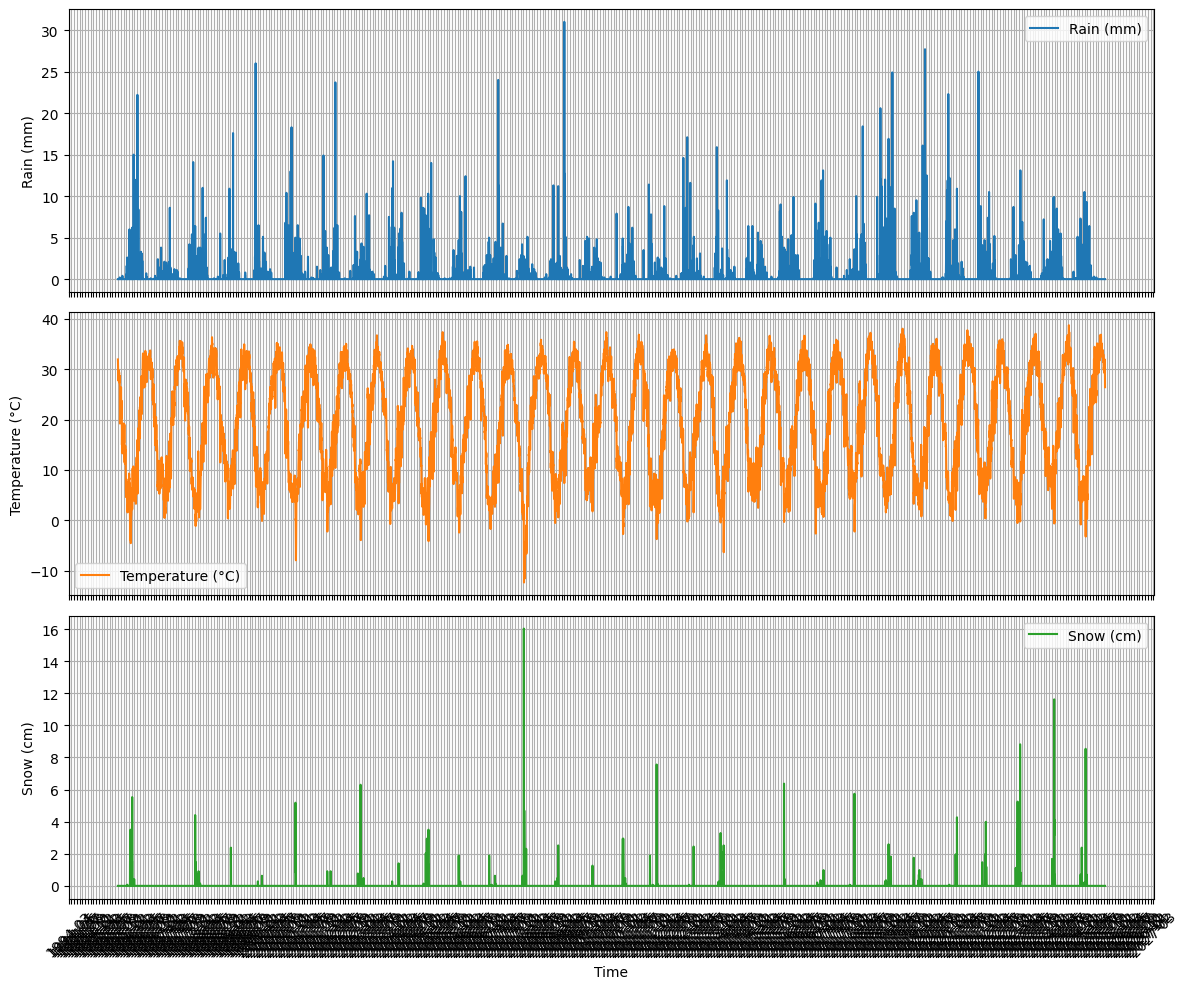

In [31]:


Temperature = Ds["temperature_2m_mean (°C)"].where(Ds["location_id"] == 2)
time = pd.to_datetime(Ds["time"], errors="coerce")
Snow = Ds["snowfall_sum (cm)"].where(Ds["location_id"] == 2)
Rain = Ds["rain_sum (mm)"].where(Ds["location_id"] == 2)


fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)


axs[0].plot(time, Rain, "C0", label="Rain (mm)")
axs[0].set_ylabel("Rain (mm)")
axs[0].legend()
axs[0].grid(True)


axs[1].plot(time, Temperature, "C1", label="Temperature (°C)")
axs[1].set_ylabel("Temperature (°C)")
axs[1].legend()
axs[1].grid(True)


axs[2].plot(time, Snow, "C2", label="Snow (cm)")
axs[2].set_ylabel("Snow (cm)")
axs[2].set_xlabel("Time")
axs[2].legend()
axs[2].grid(True)


axs[2].xaxis.set_major_locator(mdates.MonthLocator())  
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout()  
plt.show()

## Semnam

### Temperature Changes During Years

C:\Users\admin\AppData\Local\Temp\ipykernel_11720\1233755737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Semnan["time"] = pd.to_datetime(Semnan["time"])


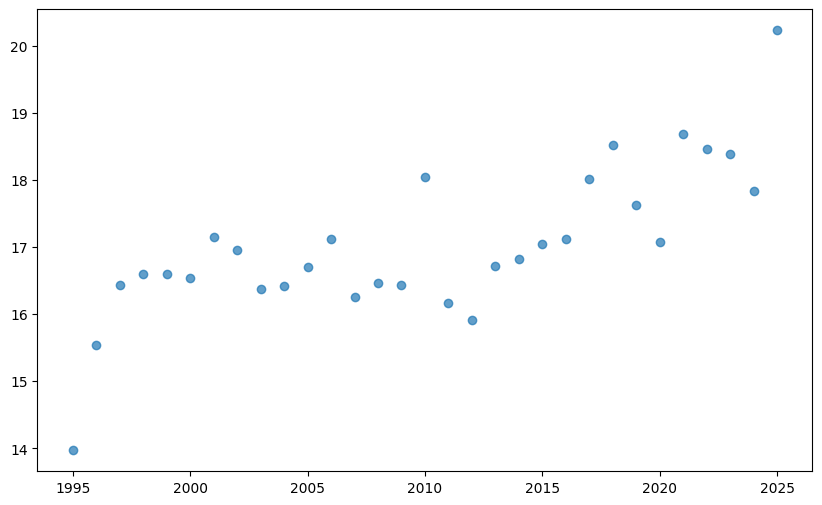

In [32]:
Semnan = Ds[Ds["location_id"] == 3]
Semnan["time"] = pd.to_datetime(Semnan["time"])
yearly_mean_temp = Semnan.groupby(Semnan["time"].dt.year)["temperature_2m_mean (°C)"].mean().reset_index()

plt.figure(figsize=(10,6))
plt.scatter(yearly_mean_temp["time"], yearly_mean_temp["temperature_2m_mean (°C)"], alpha=0.7, label="Mean Temp per Year")

### Raining Avg During Years

C:\Users\admin\AppData\Local\Temp\ipykernel_11720\300253150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Semnan["time"] = pd.to_datetime(Semnan["time"])
C:\Users\admin\AppData\Local\Temp\ipykernel_11720\300253150.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Semnan["year"] = Semnan["time"].dt.year


<BarContainer object of 31 artists>

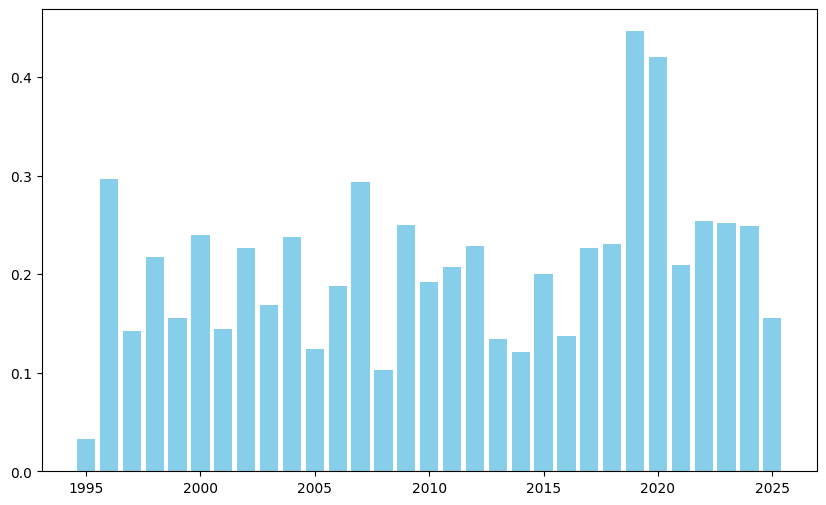

In [33]:
Semnan = Ds[Ds["location_id"] == 3]
Semnan["time"] = pd.to_datetime(Semnan["time"])
Semnan_groupby_year = Semnan.groupby(Semnan["time"])
Semnan["year"] = Semnan["time"].dt.year
Semnan
Semnan_avg_raining = Semnan_avg_by_year = Semnan.groupby("year")["rain_sum (mm)"].mean().reset_index()

Semnan_avg_raining

plt.figure(figsize=(10,6))
plt.bar(Semnan_avg_raining["year"], Semnan_avg_raining["rain_sum (mm)"], color='skyblue')


### Raining Avg Compare with DayLight Duration

C:\Users\admin\AppData\Local\Temp\ipykernel_11720\2722361472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Semnan["time"] = pd.to_datetime(Semnan["time"])
C:\Users\admin\AppData\Local\Temp\ipykernel_11720\2722361472.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Semnan["year"] = Semnan["time"].dt.year


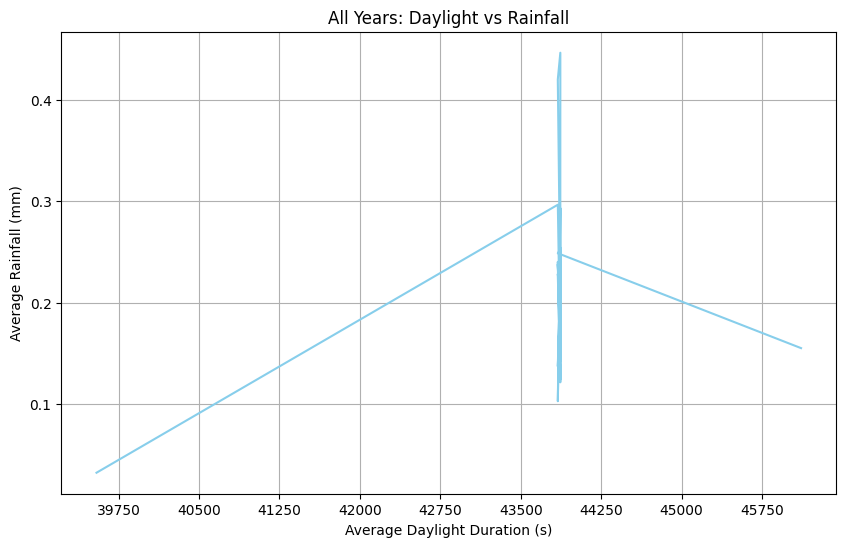

In [34]:
Semnan = Ds[Ds["location_id"] == 3]
Semnan["time"] = pd.to_datetime(Semnan["time"])
Semnan_groupby_year = Semnan.groupby(Semnan["time"])
Semnan["year"] = Semnan["time"].dt.year
Semnan
Semnan_avg_Daylight = Semnan.groupby("year")["daylight_duration (s)"].mean().reset_index()

Semnan_avg_rain = Semnan.groupby("year")["rain_sum (mm)"].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(Semnan_avg_Daylight["daylight_duration (s)"], 
         Semnan_avg_rain["rain_sum (mm)"], 
         color='skyblue')
plt.gca().yaxis.set_major_locator(MultipleLocator(0.1))
plt.gca().xaxis.set_major_locator(MultipleLocator(750))
plt.title("All Years: Daylight vs Rainfall")
plt.xlabel("Average Daylight Duration (s)")
plt.ylabel("Average Rainfall (mm)")
plt.grid(True)
plt.show()


### Compare the raining avg with The Temperture Range

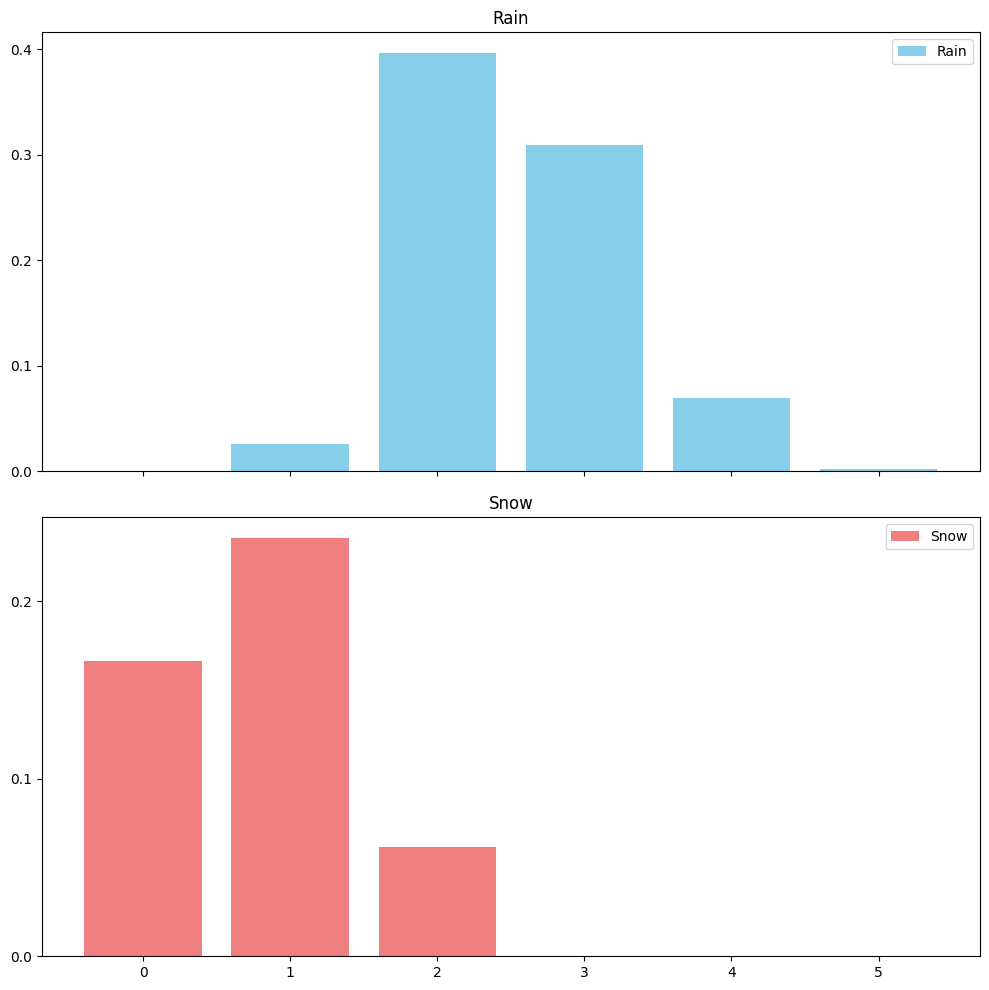

In [35]:

Semnan = Ds[Ds["location_id"] == 3]

Semnan_avg_rain = Semnan.groupby("mean_temp_Hardcode")["rain_sum (mm)"].mean().reset_index()
Semnan_avg_snow = Semnan.groupby("mean_temp_Hardcode")["snowfall_sum (cm)"].mean().reset_index()

fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

axes[0].bar(Semnan_avg_rain["mean_temp_Hardcode"], Semnan_avg_rain["rain_sum (mm)"], color='skyblue')
axes[0].set_title("Rain")
axes[0].yaxis.set_major_locator(MultipleLocator(0.1))
axes[0].legend(["Rain"])

axes[1].bar(Semnan_avg_snow["mean_temp_Hardcode"], Semnan_avg_snow["snowfall_sum (cm)"], color='lightcoral')
axes[1].set_title("Snow")
axes[1].yaxis.set_major_locator(MultipleLocator(0.1))
axes[1].legend(["Snow"])


plt.tight_layout()
plt.show()



### Compare With Wind Speed

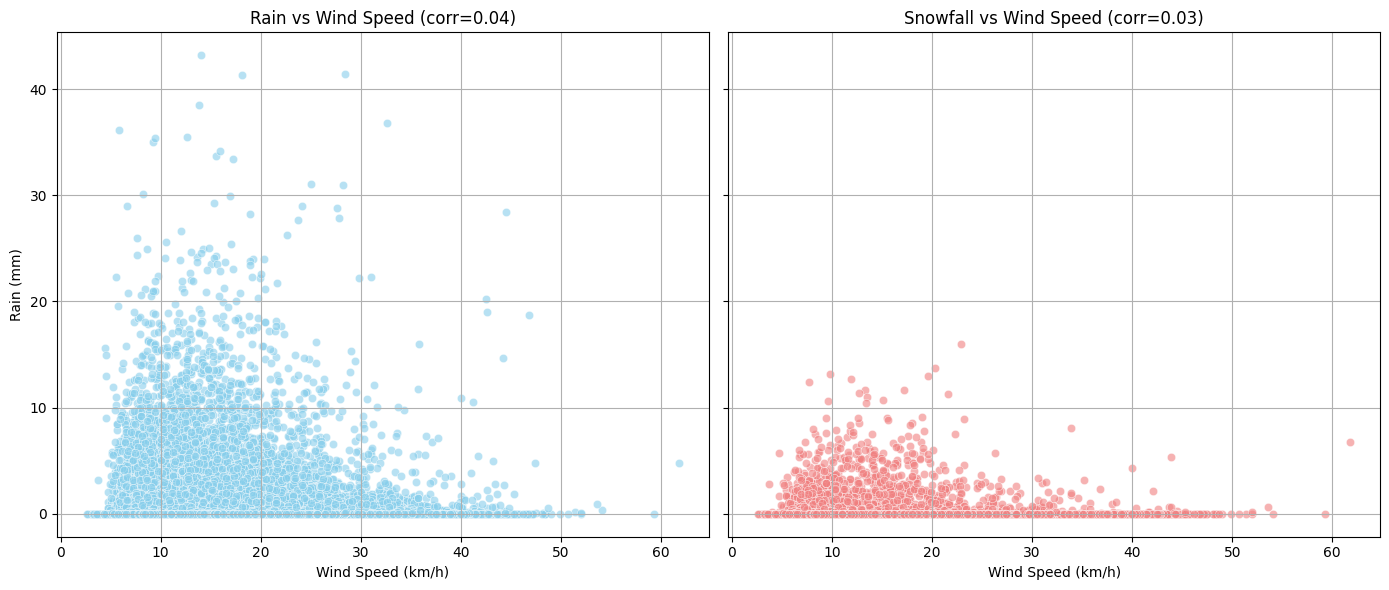

In [36]:


df = Ds[["rain_sum (mm)", "snowfall_sum (cm)", "wind_speed_10m_max (km/h)"]].dropna()

corr_rain = df["rain_sum (mm)"].corr(df["wind_speed_10m_max (km/h)"].where(Ds["location_id"] == 3))
corr_snow = df["snowfall_sum (cm)"].corr(df["wind_speed_10m_max (km/h)"].where(Ds["location_id"] == 3))


fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)


seb.scatterplot(
    x="wind_speed_10m_max (km/h)", y="rain_sum (mm)", data=df,
    alpha=0.6, ax=axes[0], color="skyblue"
)
axes[0].set_title(f"Rain vs Wind Speed (corr={corr_rain:.2f})")
axes[0].set_xlabel("Wind Speed (km/h)")
axes[0].set_ylabel("Rain (mm)")
axes[0].grid(True)


seb.scatterplot(
    x="wind_speed_10m_max (km/h)", y="snowfall_sum (cm)", data=df,
    alpha=0.6, ax=axes[1], color="lightcoral"
)
axes[1].set_title(f"Snowfall vs Wind Speed (corr={corr_snow:.2f})")
axes[1].set_xlabel("Wind Speed (km/h)")
axes[1].set_ylabel("Snowfall (cm)")
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Show The Tempurture Changes During The Year And How Effect the Raining Or Snowing

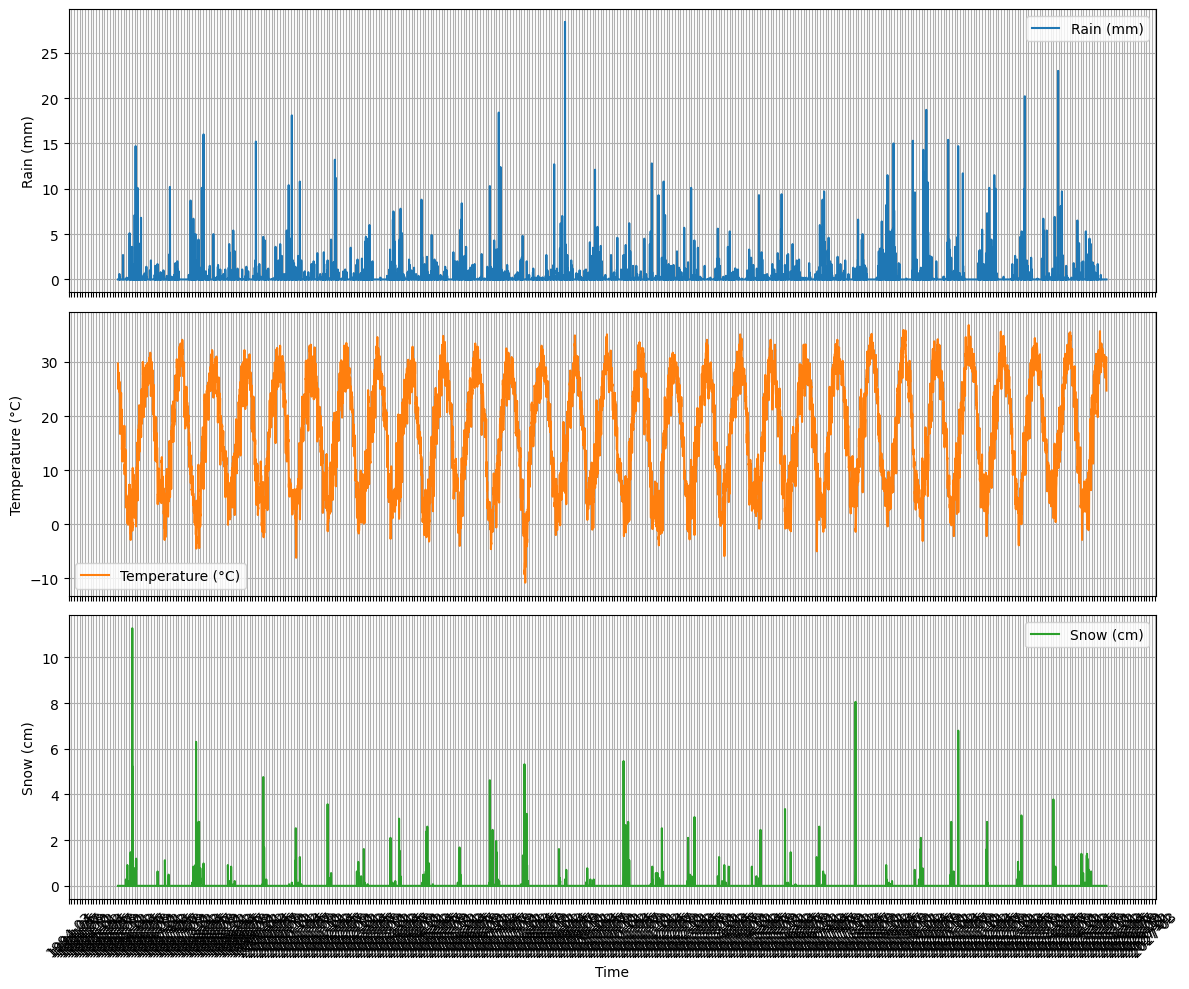

In [37]:


Temperature = Ds["temperature_2m_mean (°C)"].where(Ds["location_id"] == 3)
time = pd.to_datetime(Ds["time"], errors="coerce")
Snow = Ds["snowfall_sum (cm)"].where(Ds["location_id"] == 3)
Rain = Ds["rain_sum (mm)"].where(Ds["location_id"] == 3)


fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)


axs[0].plot(time, Rain, "C0", label="Rain (mm)")
axs[0].set_ylabel("Rain (mm)")
axs[0].legend()
axs[0].grid(True)


axs[1].plot(time, Temperature, "C1", label="Temperature (°C)")
axs[1].set_ylabel("Temperature (°C)")
axs[1].legend()
axs[1].grid(True)


axs[2].plot(time, Snow, "C2", label="Snow (cm)")
axs[2].set_ylabel("Snow (cm)")
axs[2].set_xlabel("Time")
axs[2].legend()
axs[2].grid(True)


axs[2].xaxis.set_major_locator(mdates.MonthLocator())  
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout()  
plt.show()

## Saveh

### Temperature Changes During Years

C:\Users\admin\AppData\Local\Temp\ipykernel_11720\1509728754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Zanjan["time"] = pd.to_datetime(Zanjan["time"])


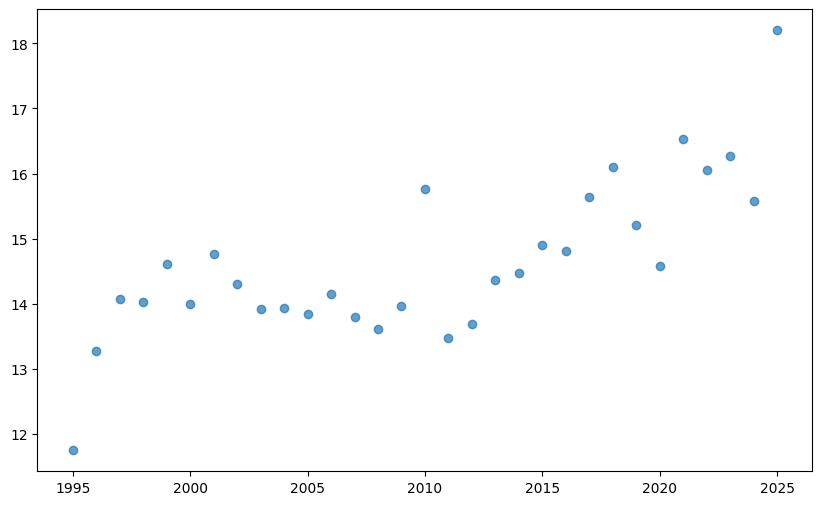

In [38]:
Zanjan = Ds[Ds["location_id"] == 4]
Zanjan["time"] = pd.to_datetime(Zanjan["time"])
yearly_mean_temp = Zanjan.groupby(Zanjan["time"].dt.year)["temperature_2m_mean (°C)"].mean().reset_index()

plt.figure(figsize=(10,6))
plt.scatter(yearly_mean_temp["time"], yearly_mean_temp["temperature_2m_mean (°C)"], alpha=0.7, label="Mean Temp per Year")

### Raining Avg During Years

C:\Users\admin\AppData\Local\Temp\ipykernel_11720\2930229486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Saveh["time"] = pd.to_datetime(Saveh["time"])
C:\Users\admin\AppData\Local\Temp\ipykernel_11720\2930229486.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Saveh["year"] = Saveh["time"].dt.year


<BarContainer object of 31 artists>

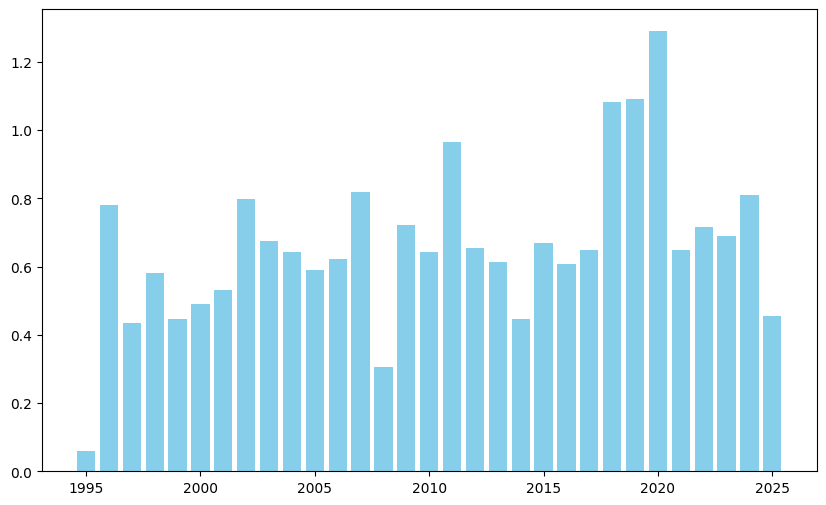

In [39]:
Saveh = Ds[Ds["location_id"] == 4]
Saveh["time"] = pd.to_datetime(Saveh["time"])
Saveh_groupby_year = Saveh.groupby(Saveh["time"])
Saveh["year"] = Saveh["time"].dt.year
Saveh
Saveh_avg_raining = Saveh_avg_by_year = Saveh.groupby("year")["rain_sum (mm)"].mean().reset_index()

Saveh_avg_raining

plt.figure(figsize=(10,6))
plt.bar(Saveh_avg_raining["year"], Saveh_avg_raining["rain_sum (mm)"], color='skyblue')


### Raining Avg Compare with DayLight Duration

C:\Users\admin\AppData\Local\Temp\ipykernel_11720\1331040985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Saveh["time"] = pd.to_datetime(Saveh["time"])
C:\Users\admin\AppData\Local\Temp\ipykernel_11720\1331040985.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Saveh["year"] = Saveh["time"].dt.year


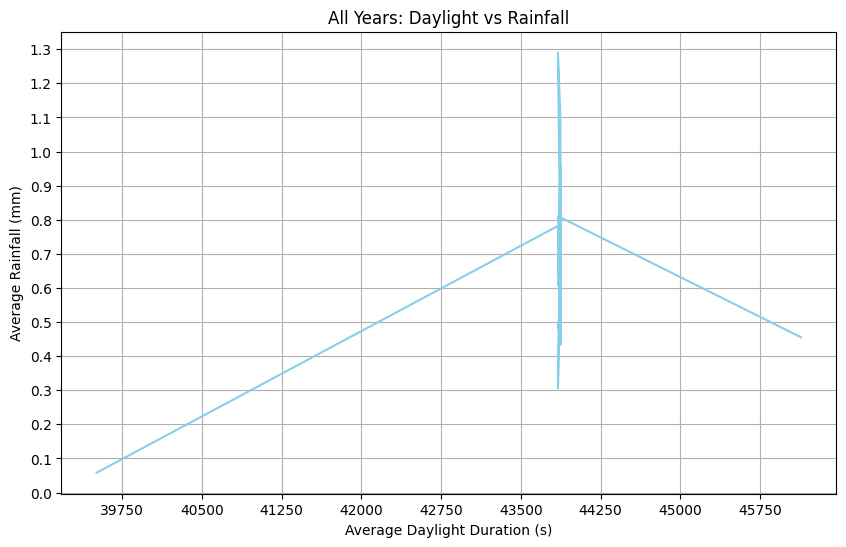

In [40]:
Saveh = Ds[Ds["location_id"] == 4]
Saveh["time"] = pd.to_datetime(Saveh["time"])
Saveh_groupby_year = Saveh.groupby(Saveh["time"])
Saveh["year"] = Saveh["time"].dt.year
Saveh
Saveh_avg_Daylight = Saveh.groupby("year")["daylight_duration (s)"].mean().reset_index()

Saveh_avg_rain = Saveh.groupby("year")["rain_sum (mm)"].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(Saveh_avg_Daylight["daylight_duration (s)"], 
         Saveh_avg_rain["rain_sum (mm)"], 
         color='skyblue')
plt.gca().yaxis.set_major_locator(MultipleLocator(0.1))
plt.gca().xaxis.set_major_locator(MultipleLocator(750))
plt.title("All Years: Daylight vs Rainfall")
plt.xlabel("Average Daylight Duration (s)")
plt.ylabel("Average Rainfall (mm)")
plt.grid(True)
plt.show()


### Compare the raining avg with The Temperture Range

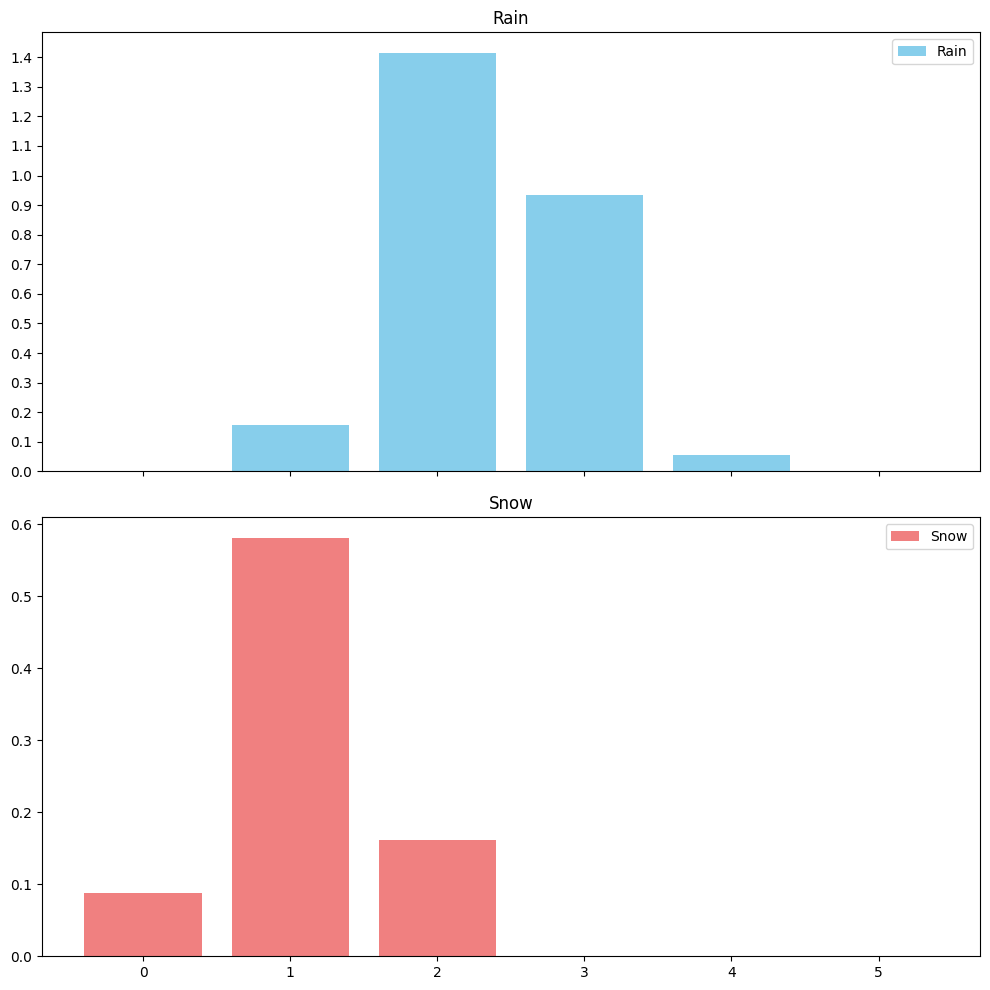

In [41]:

Saveh = Ds[Ds["location_id"] == 4]

Saveh_avg_rain = Saveh.groupby("mean_temp_Hardcode")["rain_sum (mm)"].mean().reset_index()
Saveh_avg_snow = Saveh.groupby("mean_temp_Hardcode")["snowfall_sum (cm)"].mean().reset_index()

fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

axes[0].bar(Saveh_avg_rain["mean_temp_Hardcode"], Saveh_avg_rain["rain_sum (mm)"], color='skyblue')
axes[0].set_title("Rain")
axes[0].yaxis.set_major_locator(MultipleLocator(0.1))
axes[0].legend(["Rain"])

axes[1].bar(Saveh_avg_snow["mean_temp_Hardcode"], Saveh_avg_snow["snowfall_sum (cm)"], color='lightcoral')
axes[1].set_title("Snow")
axes[1].yaxis.set_major_locator(MultipleLocator(0.1))
axes[1].legend(["Snow"])


plt.tight_layout()
plt.show()



### Compare With Wind Speed

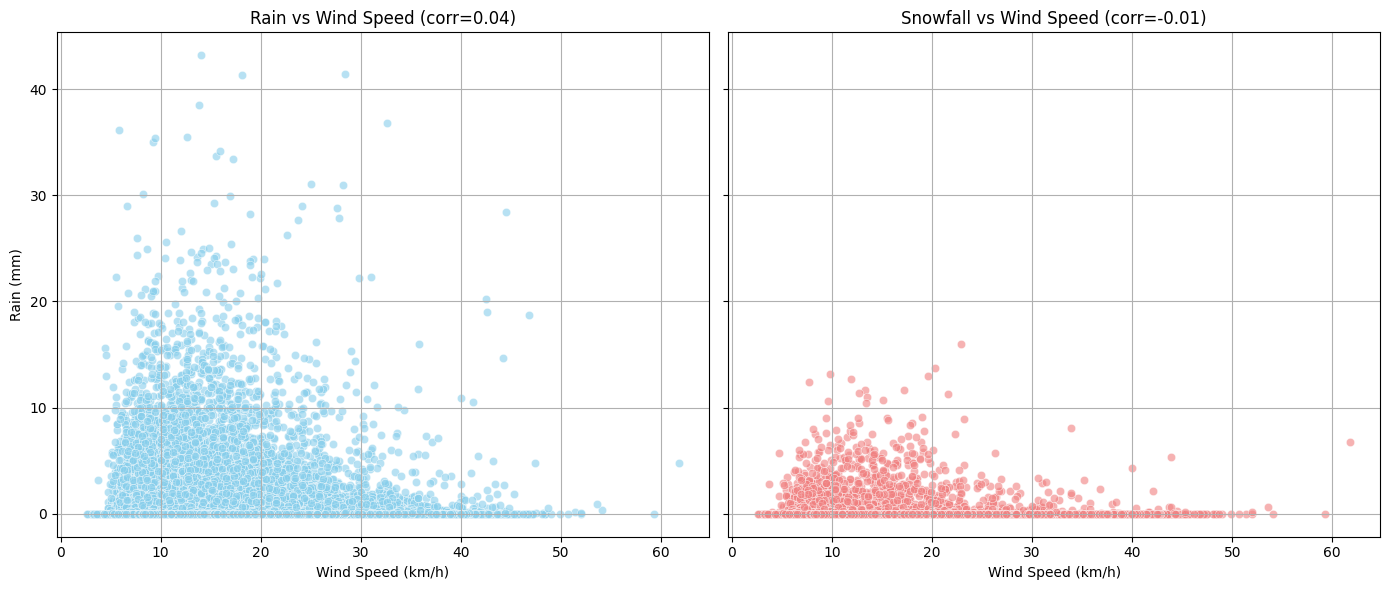

In [42]:


df = Ds[["rain_sum (mm)", "snowfall_sum (cm)", "wind_speed_10m_max (km/h)"]].dropna()

corr_rain = df["rain_sum (mm)"].corr(df["wind_speed_10m_max (km/h)"].where(Ds["location_id"] == 4))
corr_snow = df["snowfall_sum (cm)"].corr(df["wind_speed_10m_max (km/h)"].where(Ds["location_id"] == 4))


fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)


seb.scatterplot(
    x="wind_speed_10m_max (km/h)", y="rain_sum (mm)", data=df,
    alpha=0.6, ax=axes[0], color="skyblue"
)
axes[0].set_title(f"Rain vs Wind Speed (corr={corr_rain:.2f})")
axes[0].set_xlabel("Wind Speed (km/h)")
axes[0].set_ylabel("Rain (mm)")
axes[0].grid(True)


seb.scatterplot(
    x="wind_speed_10m_max (km/h)", y="snowfall_sum (cm)", data=df,
    alpha=0.6, ax=axes[1], color="lightcoral"
)
axes[1].set_title(f"Snowfall vs Wind Speed (corr={corr_snow:.2f})")
axes[1].set_xlabel("Wind Speed (km/h)")
axes[1].set_ylabel("Snowfall (cm)")
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Show The Tempurture Changes During The Year And How Effect the Raining Or Snowing

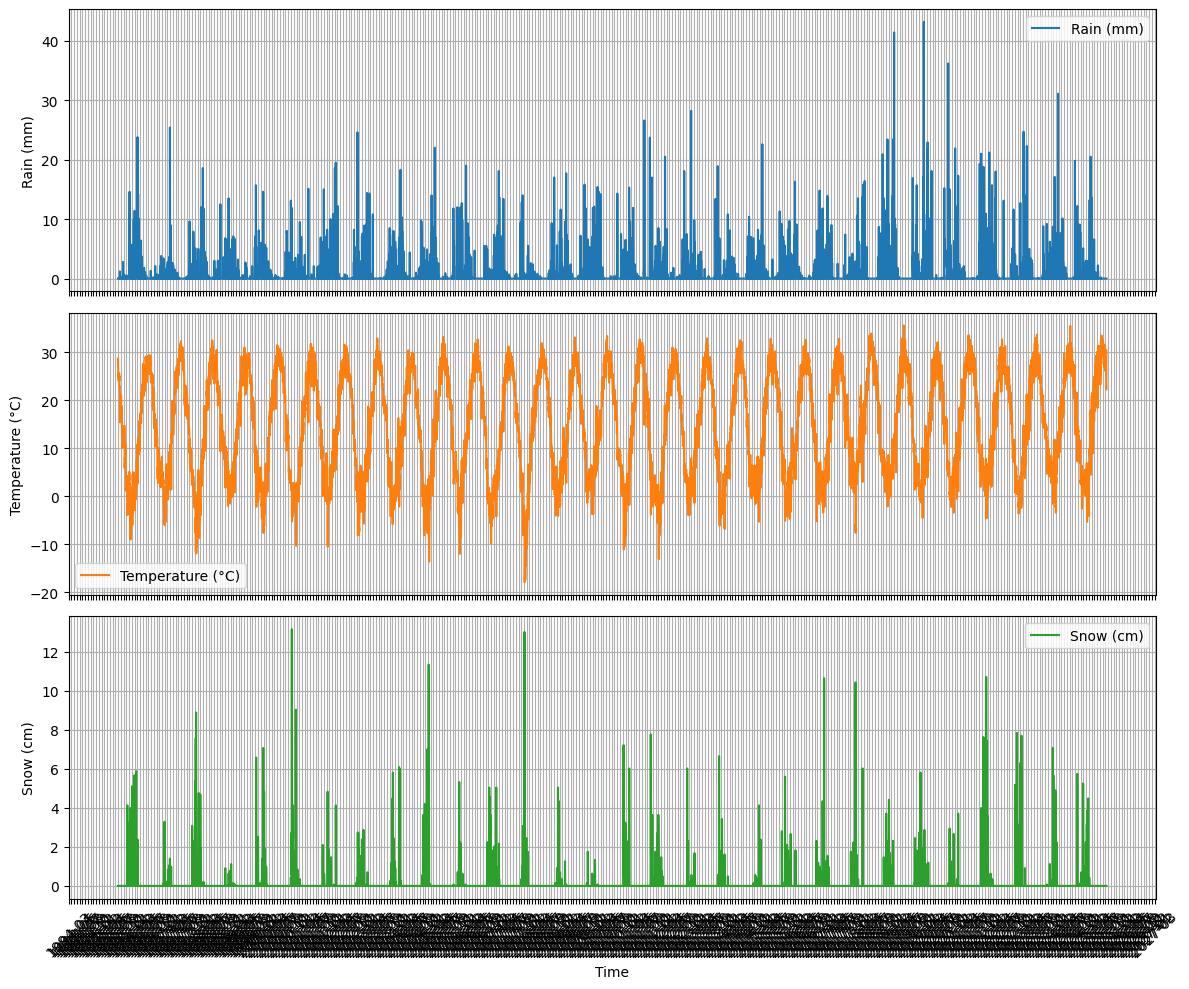

In [43]:


Temperature = Ds["temperature_2m_mean (°C)"].where(Ds["location_id"] == 4)
time = pd.to_datetime(Ds["time"], errors="coerce")
Snow = Ds["snowfall_sum (cm)"].where(Ds["location_id"] == 4)
Rain = Ds["rain_sum (mm)"].where(Ds["location_id"] == 4)


fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)


axs[0].plot(time, Rain, "C0", label="Rain (mm)")
axs[0].set_ylabel("Rain (mm)")
axs[0].legend()
axs[0].grid(True)


axs[1].plot(time, Temperature, "C1", label="Temperature (°C)")
axs[1].set_ylabel("Temperature (°C)")
axs[1].legend()
axs[1].grid(True)


axs[2].plot(time, Snow, "C2", label="Snow (cm)")
axs[2].set_ylabel("Snow (cm)")
axs[2].set_xlabel("Time")
axs[2].legend()
axs[2].grid(True)


axs[2].xaxis.set_major_locator(mdates.MonthLocator())  
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout()  
plt.show()

# Intercity Rainfall Correlation


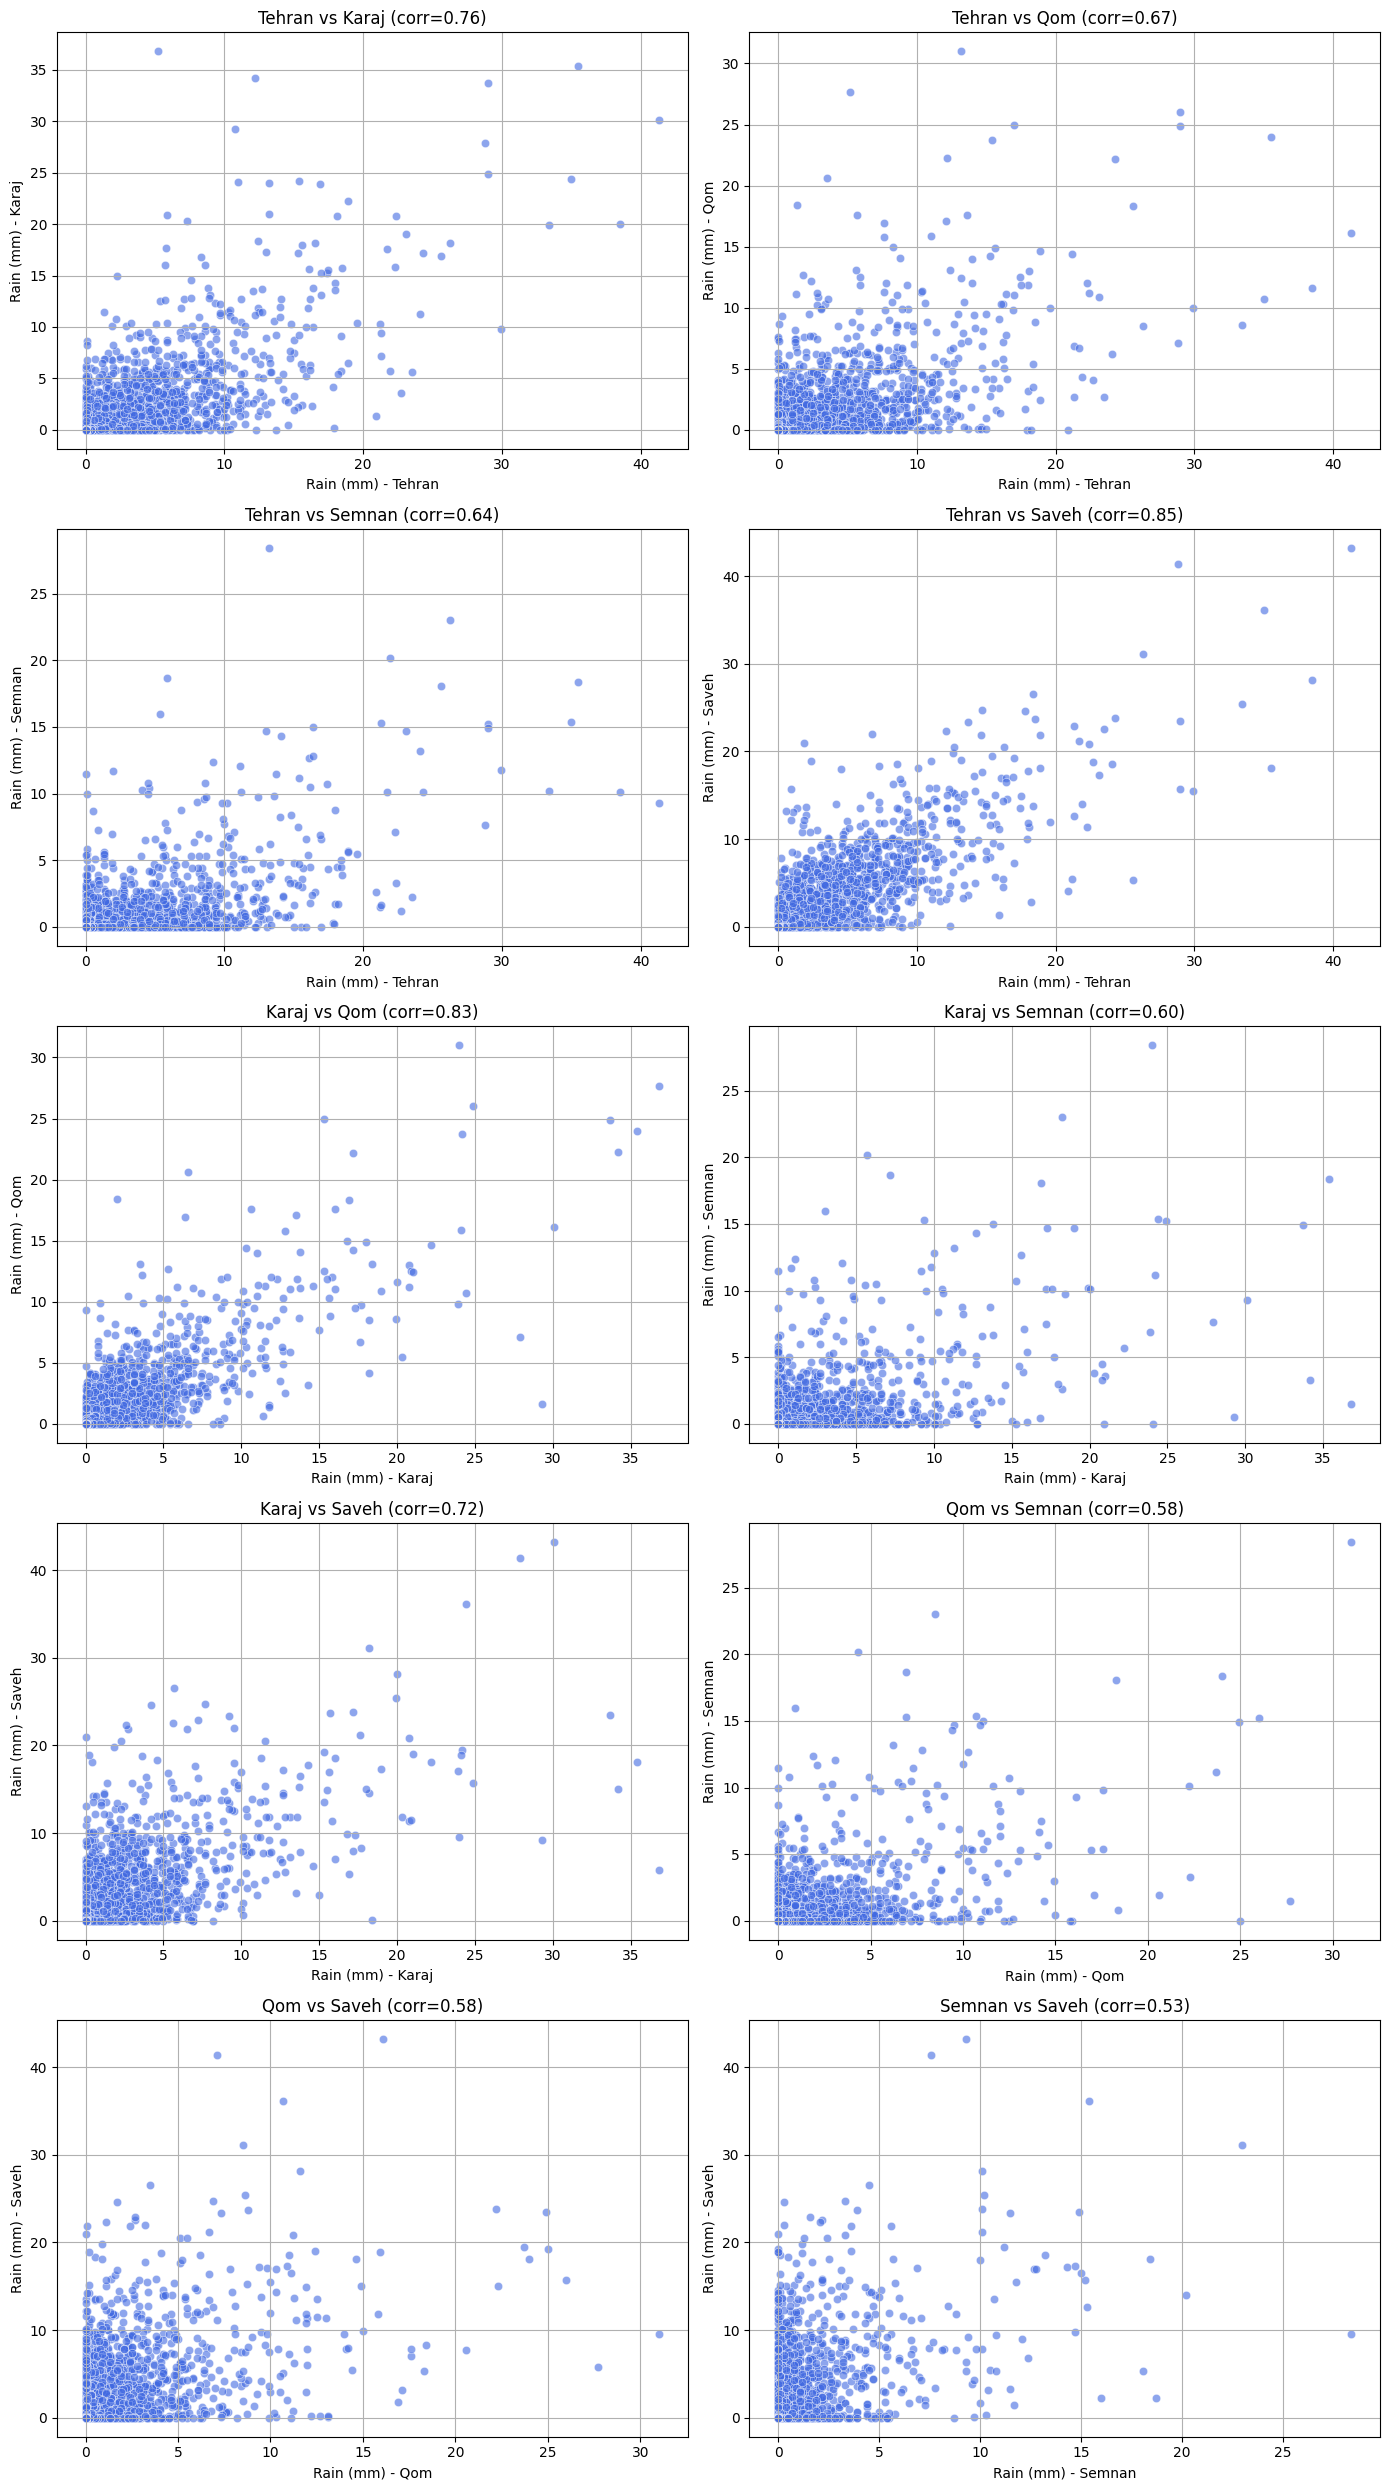

In [44]:

city_names = {0: "Tehran",1: "Karaj",2: "Qom",3: "Semnan",4: "Saveh" }

def compare_two_cities(city_a, city_b):
    rain_a = Ds[Ds["location_id"] == city_a][["time", "rain_sum (mm)"]].set_index("time")
    rain_b = Ds[Ds["location_id"] == city_b][["time", "rain_sum (mm)"]].set_index("time")
    
    rain_compare = rain_a.join(rain_b, lsuffix=f"_{city_names[city_a]}", rsuffix=f"_{city_names[city_b]}").dropna()
    
  
    corr_val = rain_compare[f"rain_sum (mm)_{city_names[city_a]}"].corr(
        rain_compare[f"rain_sum (mm)_{city_names[city_b]}"]
    )
   
    sns.scatterplot(
        x=f"rain_sum (mm)_{city_names[city_a]}",
        y=f"rain_sum (mm)_{city_names[city_b]}",
        data=rain_compare,
        alpha=0.6, color="royalblue"
    )
    plt.title(f"{city_names[city_a]} vs {city_names[city_b]} (corr={corr_val:.2f})")
    plt.xlabel(f"Rain (mm) - {city_names[city_a]}")
    plt.ylabel(f"Rain (mm) - {city_names[city_b]}")
    plt.grid(True)

cities = [0, 1, 2, 3, 4]
pairs = list(itertools.combinations(cities, 2))
plt.figure(figsize=(14, 25))
# inja omadam beyn on 10 joft ke to pairs tolid shode bood ye loop sakhtam 
for i, (c1, c2) in enumerate(pairs, 1):
    plt.subplot(5, 2, i)
    compare_two_cities(c1, c2)

plt.tight_layout()
plt.show()


# Intercity Snowfall Correlation

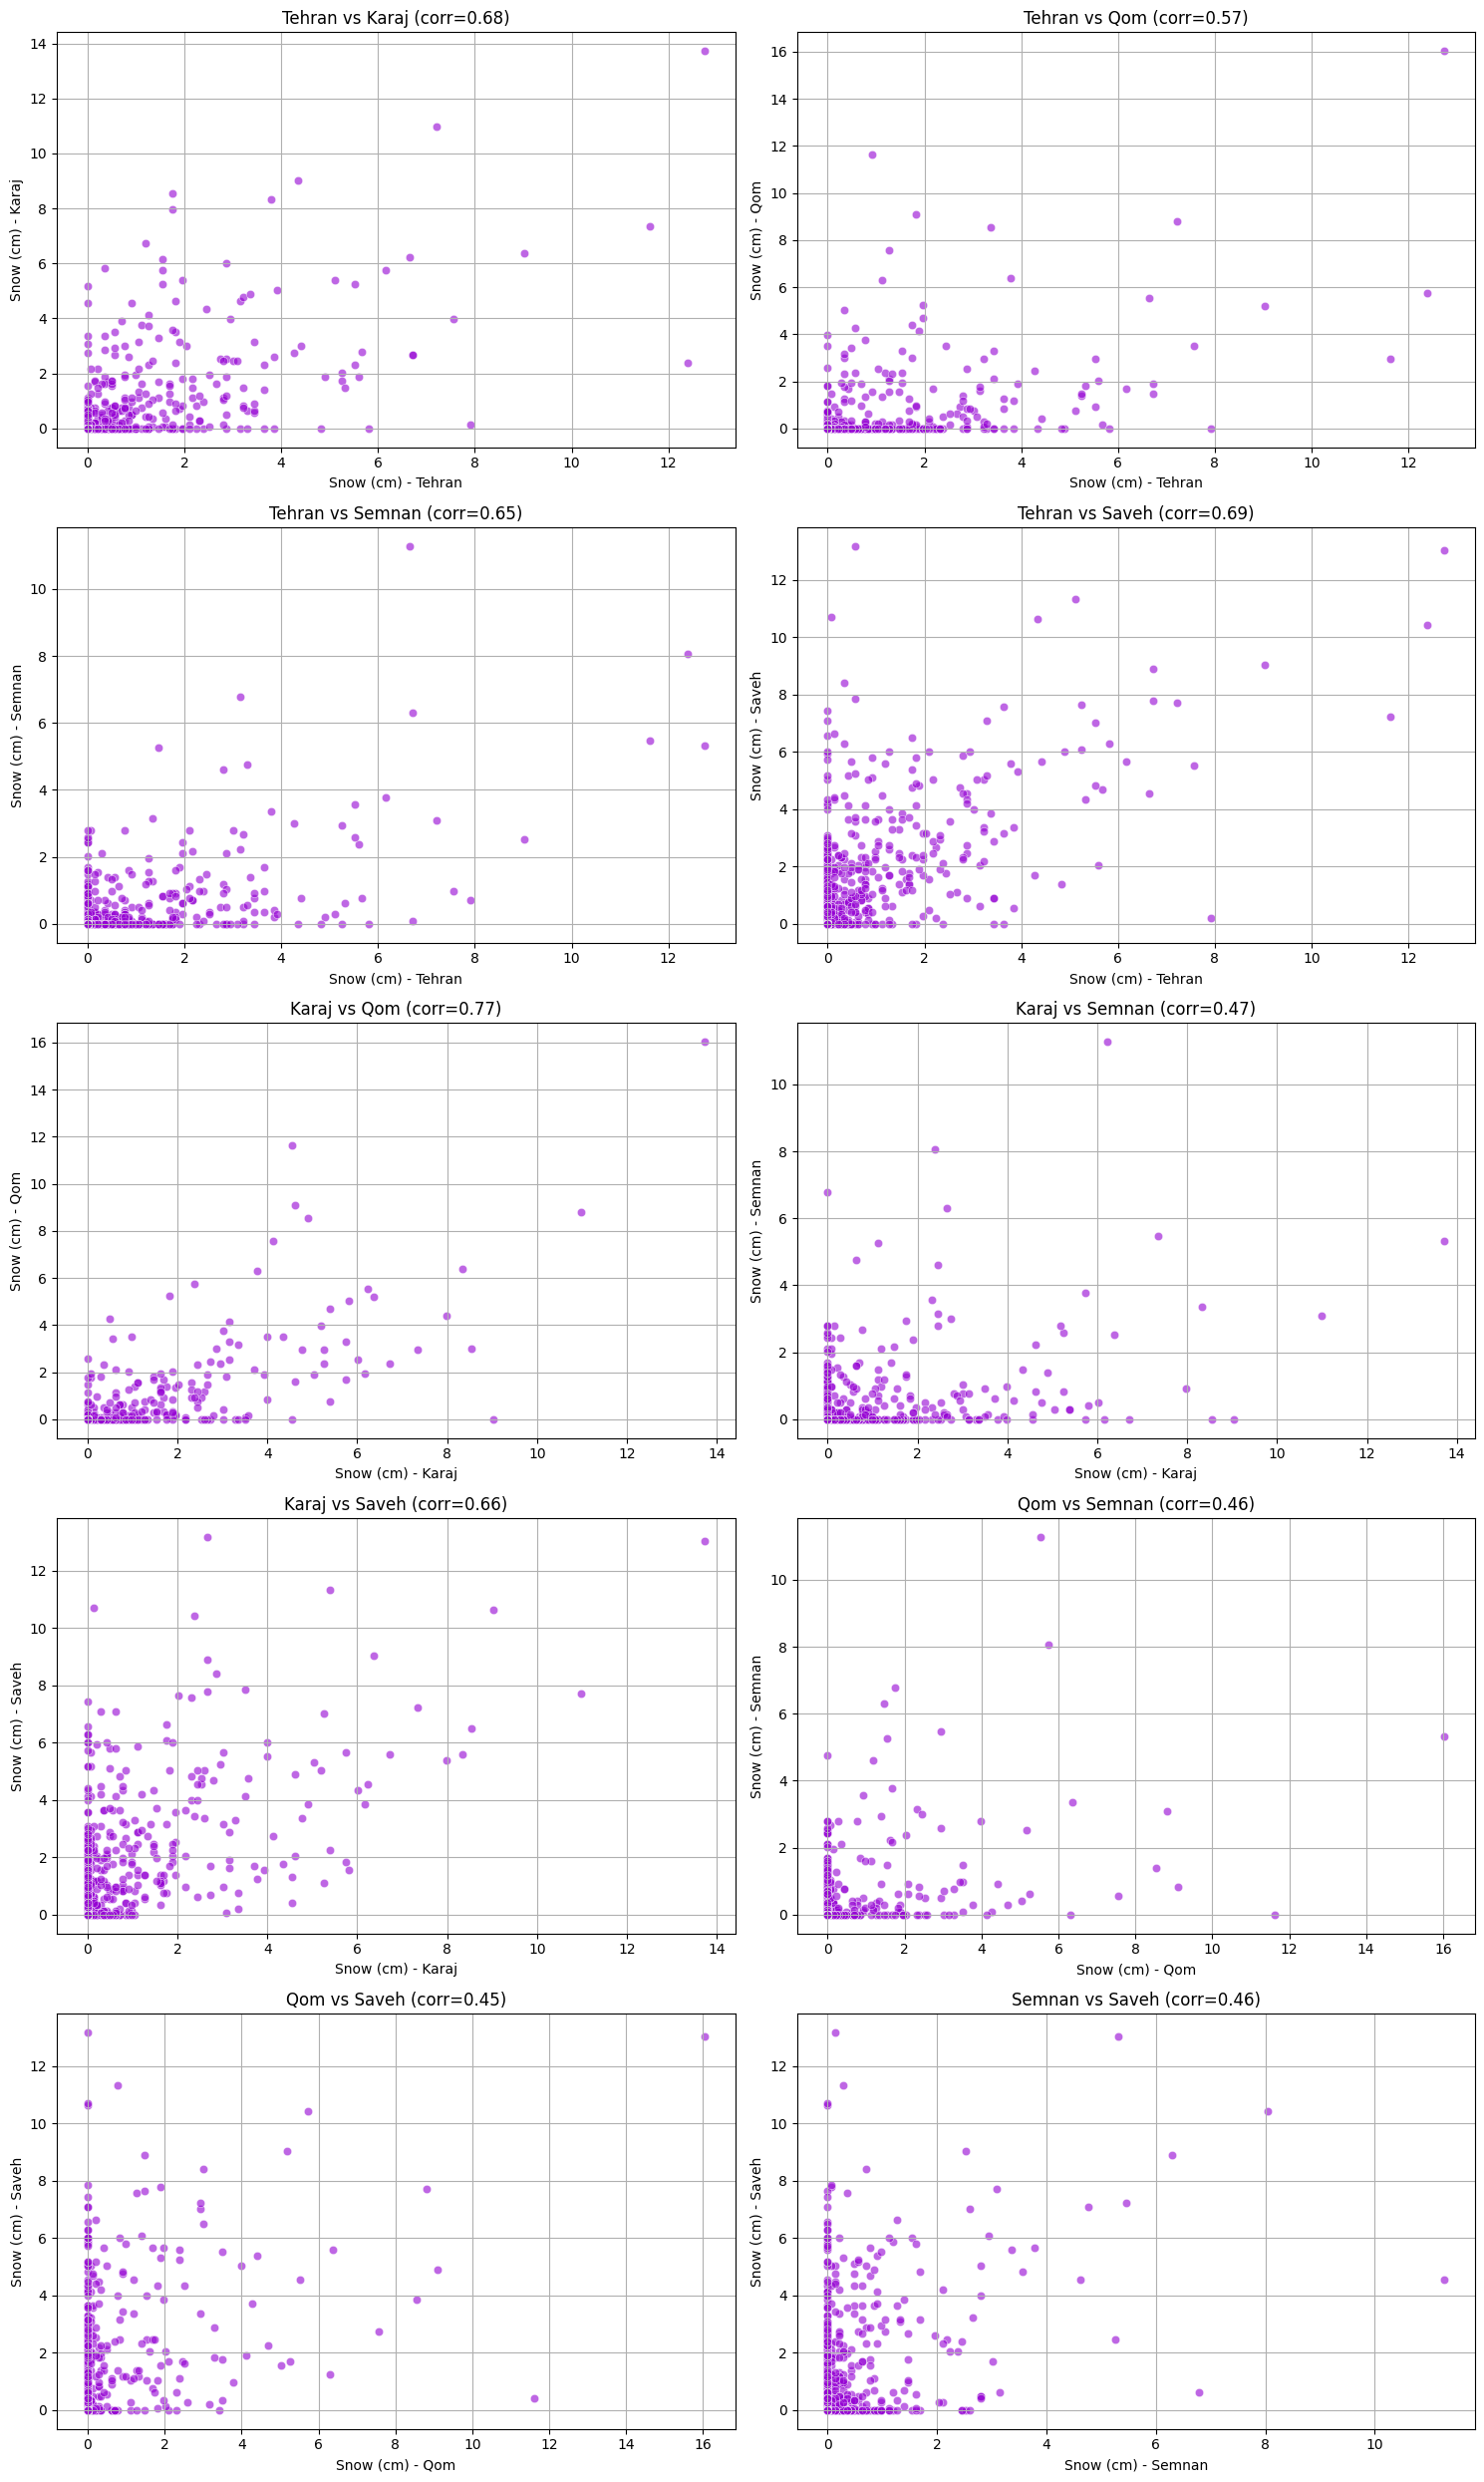

In [45]:

city_names = {0: "Tehran",1: "Karaj",2: "Qom",3: "Semnan",4: "Saveh" }

def compare_two_cities(city_a, city_b):
    snow_a = Ds[Ds["location_id"] == city_a][["time", "snowfall_sum (cm)"]].set_index("time")
    snow_b = Ds[Ds["location_id"] == city_b][["time", "snowfall_sum (cm)"]].set_index("time")
    
    rain_compare = snow_a.join(snow_b, lsuffix=f"_{city_names[city_a]}", rsuffix=f"_{city_names[city_b]}").dropna()
    
  
    corr_val = rain_compare[f"snowfall_sum (cm)_{city_names[city_a]}"].corr(
        rain_compare[f"snowfall_sum (cm)_{city_names[city_b]}"]
    )
   
    sns.scatterplot(
        x=f"snowfall_sum (cm)_{city_names[city_a]}",
        y=f"snowfall_sum (cm)_{city_names[city_b]}",
        data=rain_compare,
        alpha=0.6, color="darkviolet"
    )
    plt.title(f"{city_names[city_a]} vs {city_names[city_b]} (corr={corr_val:.2f})")
    plt.xlabel(f"Snow (cm) - {city_names[city_a]}")
    plt.ylabel(f"Snow (cm) - {city_names[city_b]}")
    plt.grid(True)

cities = [0, 1, 2, 3, 4]
pairs = list(itertools.combinations(cities, 2))
plt.figure(figsize=(15, 25))
# inja omadam beyn on 10 joft ke to pairs tolid shode bood ye loop sakhtam 
for i, (c1, c2) in enumerate(pairs, 1):
    plt.subplot(5, 2, i)
    compare_two_cities(c1, c2)

plt.tight_layout()
plt.show()


# Intercity Temperature Correlation

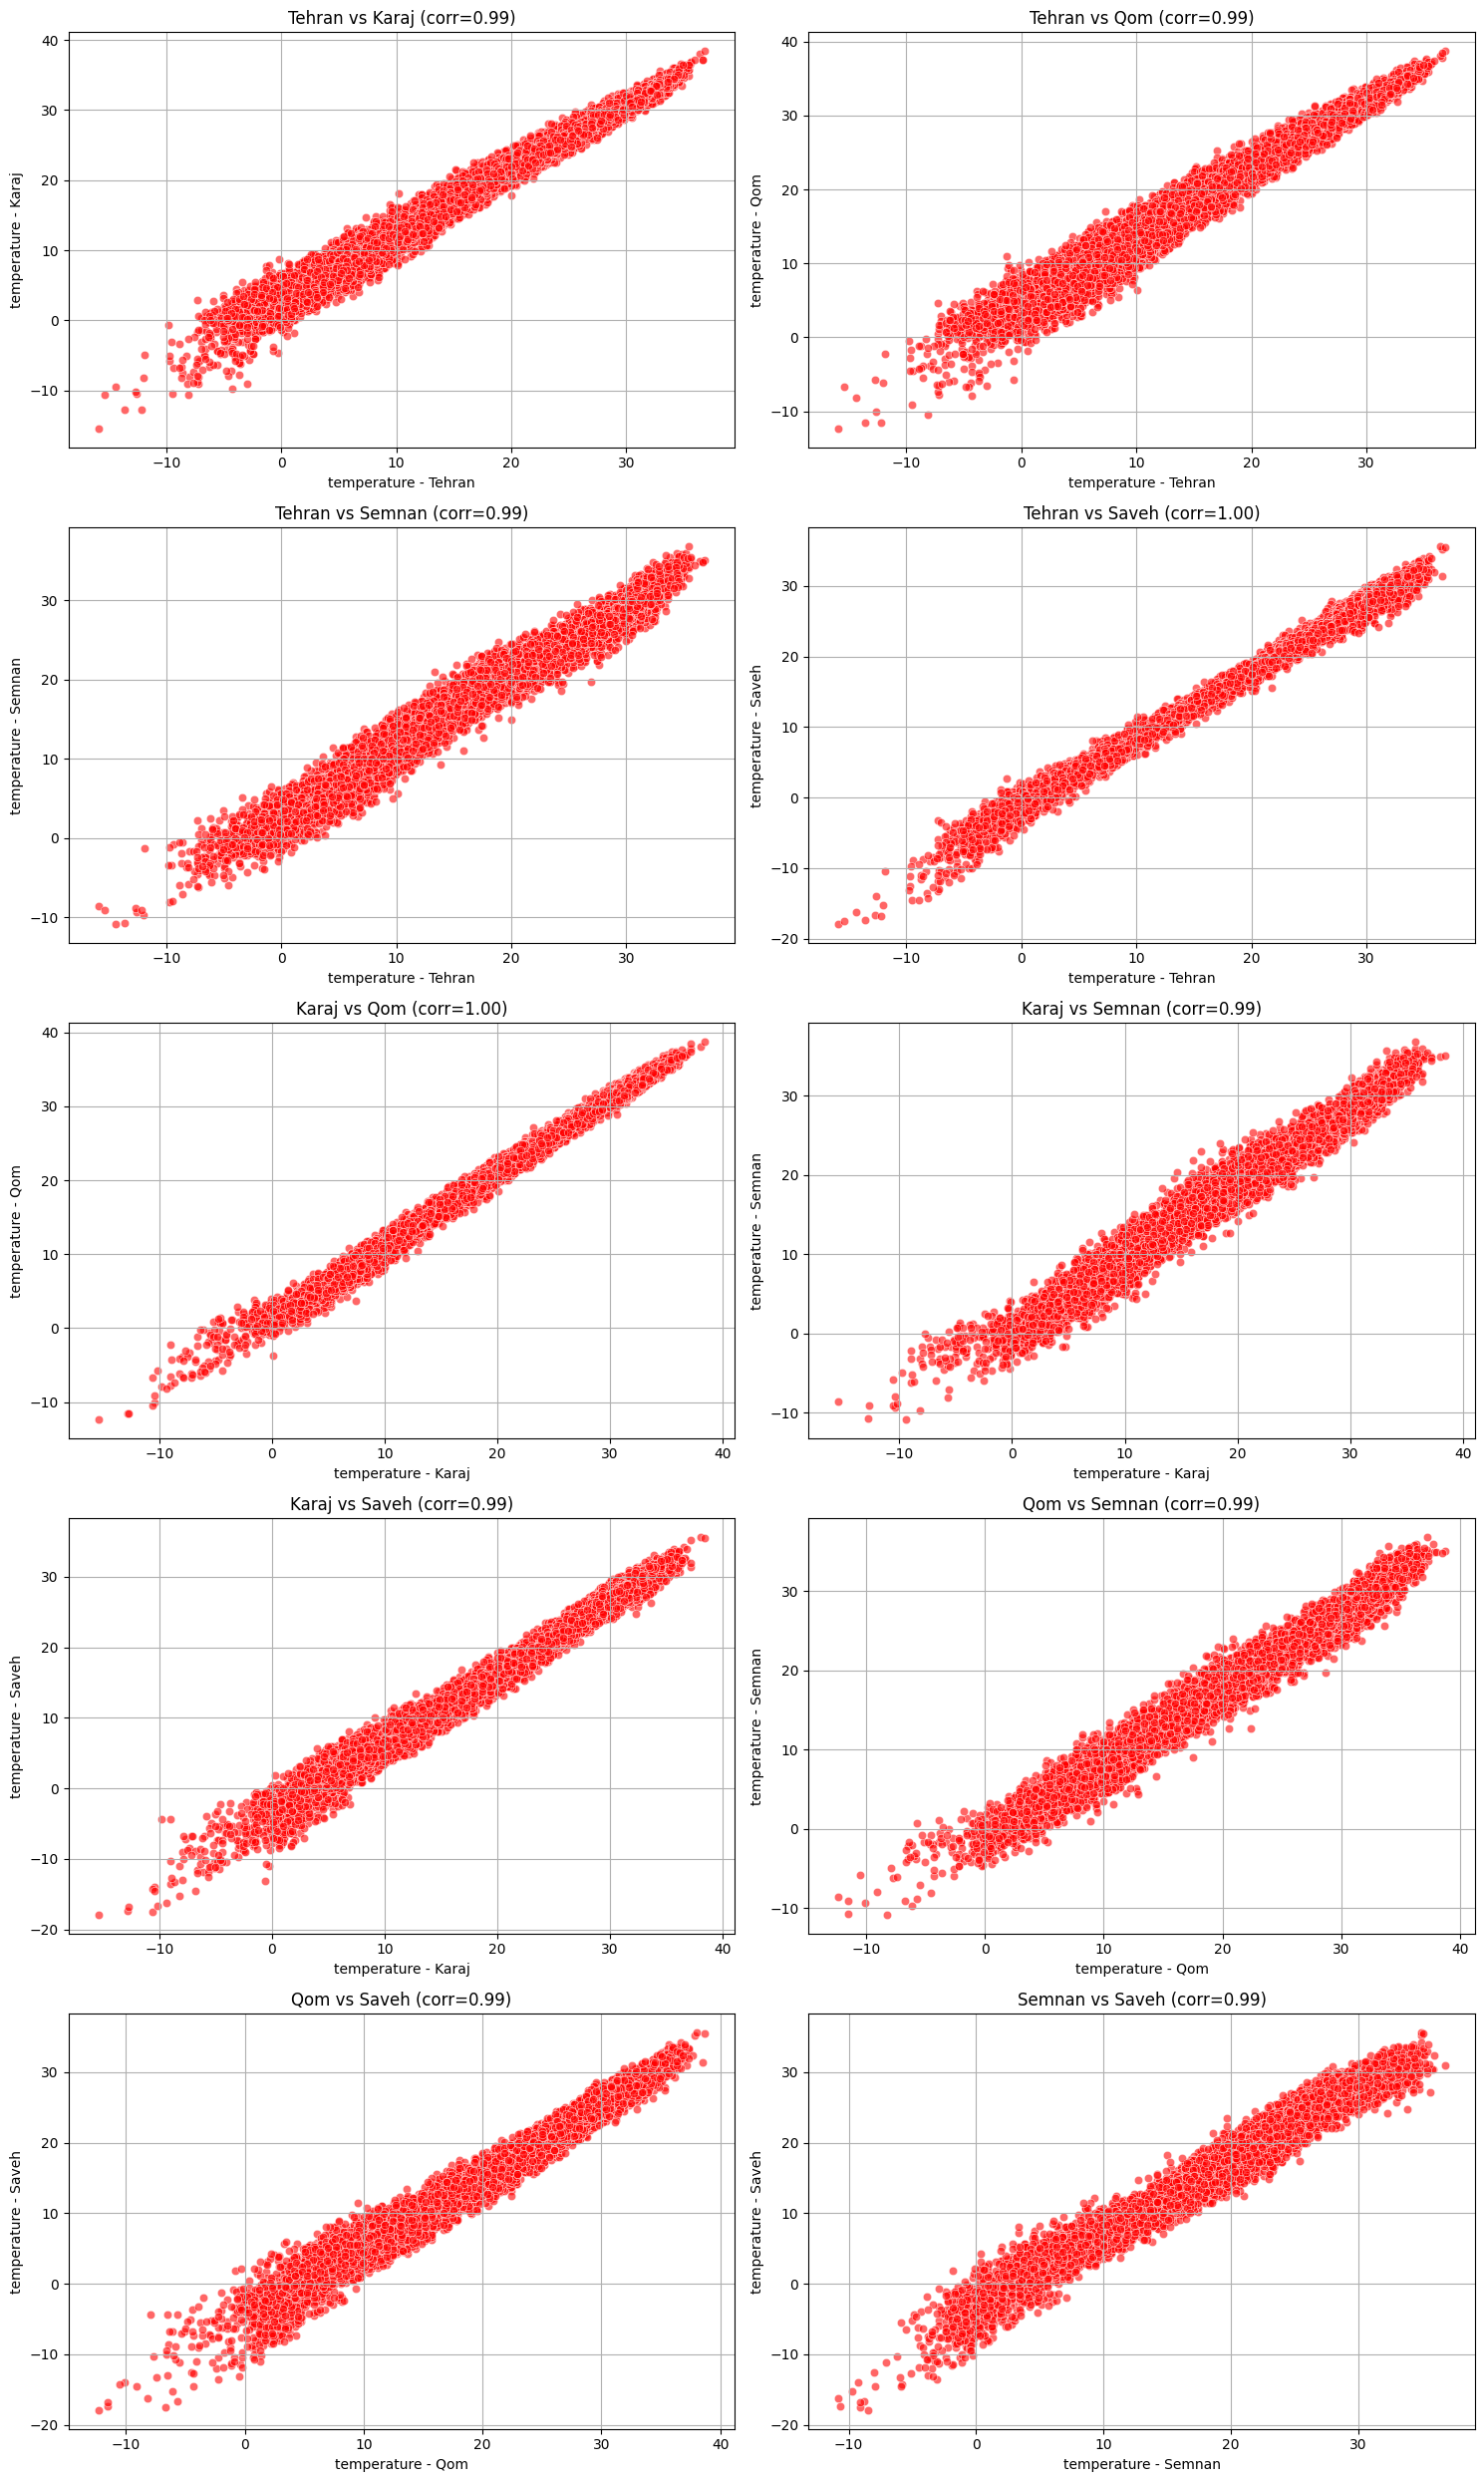

In [46]:

city_names = {0: "Tehran",1: "Karaj",2: "Qom",3: "Semnan",4: "Saveh" }

def compare_two_cities(city_a, city_b):
    snow_a = Ds[Ds["location_id"] == city_a][["time", "temperature_2m_mean (°C)"]].set_index("time")
    snow_b = Ds[Ds["location_id"] == city_b][["time", "temperature_2m_mean (°C)"]].set_index("time")
    
    rain_compare = snow_a.join(snow_b, lsuffix=f"_{city_names[city_a]}", rsuffix=f"_{city_names[city_b]}").dropna()
    
  
    corr_val = rain_compare[f"temperature_2m_mean (°C)_{city_names[city_a]}"].corr(
        rain_compare[f"temperature_2m_mean (°C)_{city_names[city_b]}"]
    )
   
    sns.scatterplot(
        x=f"temperature_2m_mean (°C)_{city_names[city_a]}",
        y=f"temperature_2m_mean (°C)_{city_names[city_b]}",
        data=rain_compare,
        alpha=0.6, color="red"
    )
    plt.title(f"{city_names[city_a]} vs {city_names[city_b]} (corr={corr_val:.2f})")
    plt.xlabel(f"temperature - {city_names[city_a]}")
    plt.ylabel(f"temperature - {city_names[city_b]}")
    plt.grid(True)

cities = [0, 1, 2, 3, 4]
pairs = list(itertools.combinations(cities, 2))
plt.figure(figsize=(15, 25))
# inja omadam beyn on 10 joft ke to pairs tolid shode bood ye loop sakhtam 
for i, (c1, c2) in enumerate(pairs, 1):
    plt.subplot(5, 2, i)
    compare_two_cities(c1, c2)

plt.tight_layout()
plt.show()


# Pairwise Temperature Visualization

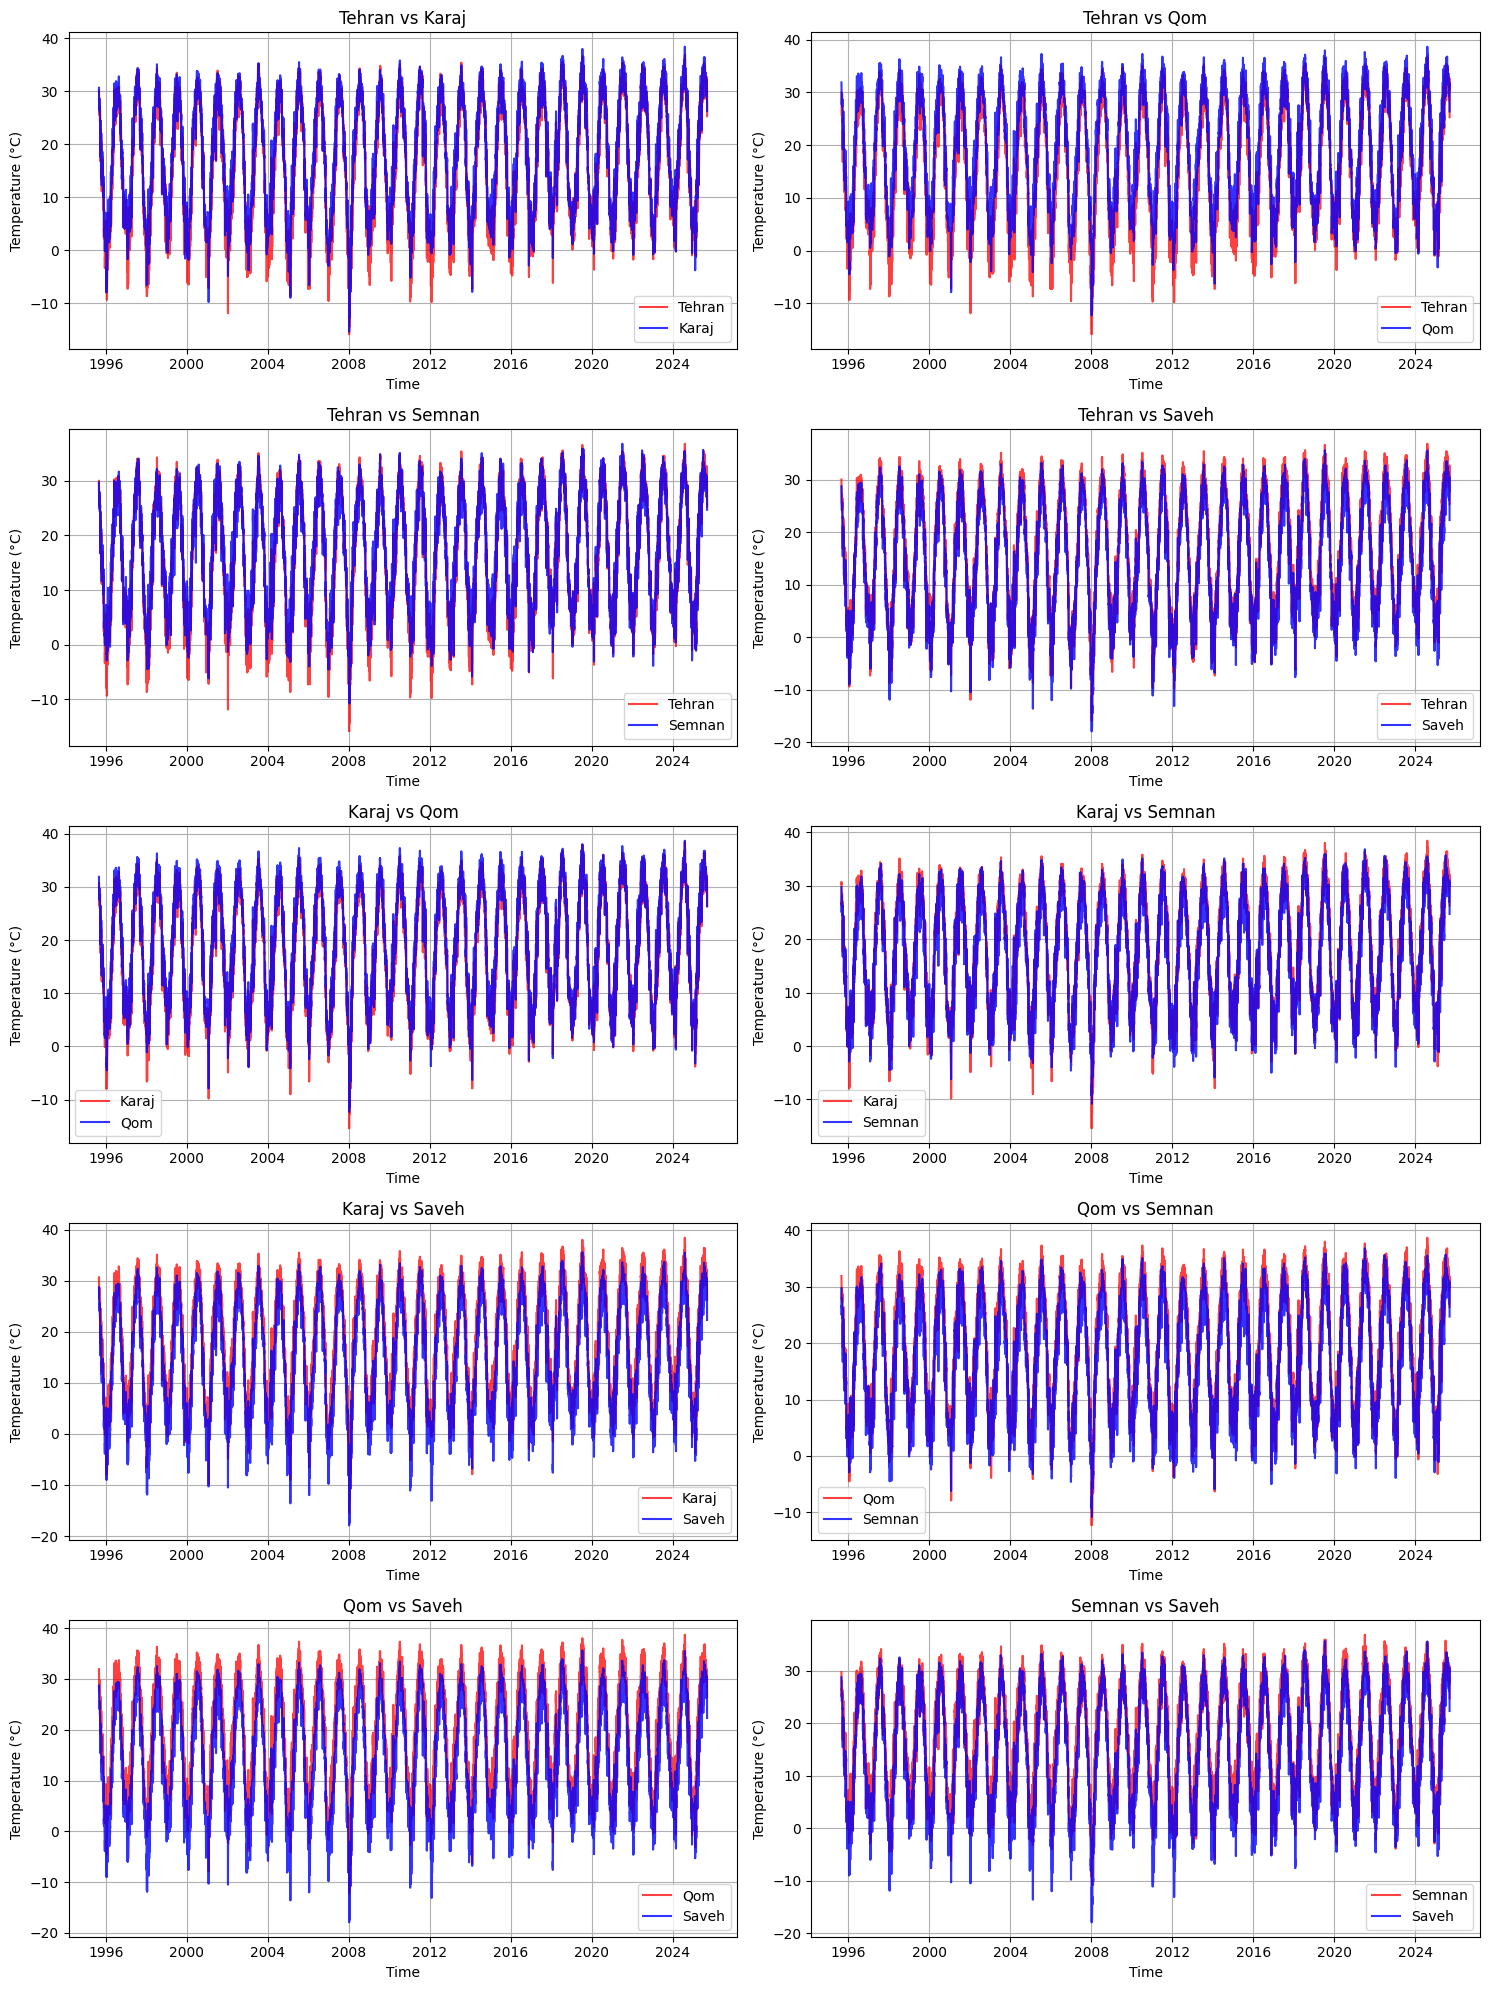

In [47]:
city_names = {0: "Tehran", 1: "Karaj", 2: "Qom", 3: "Semnan", 4: "Saveh"}

def compare_two_cities(ax, city_a, city_b):

    temp_a = Ds[Ds["location_id"] == city_a][["time", "temperature_2m_mean (°C)"]].copy()
    temp_b = Ds[Ds["location_id"] == city_b][["time", "temperature_2m_mean (°C)"]].copy()
  

    temp_a['time'] = pd.to_datetime(temp_a['time'])
    temp_b['time'] = pd.to_datetime(temp_b['time'])


    ax.plot(temp_a["time"], temp_a["temperature_2m_mean (°C)"], color='red', label=f"{city_names[city_a]}",alpha =0.75 )
    ax.plot(temp_b["time"], temp_b["temperature_2m_mean (°C)"], color='blue', label=f"{city_names[city_b]}", alpha = 0.8)


    ax.set_title(f"{city_names[city_a]} vs {city_names[city_b]}")
    ax.set_xlabel("Time")
    ax.set_ylabel("Temperature (°C)")


    ax.legend()
    ax.grid(True)


cities = [0, 1, 2, 3, 4]  
pairs = list(itertools.combinations(cities, 2))  

fig, axes = plt.subplots(5, 2, figsize=(15, 20)) 
axes = axes.flatten() 

for i, (c1, c2) in enumerate(pairs):
    compare_two_cities(axes[i], c1, c2)

plt.tight_layout()
plt.show()